# Chapter 8: Restructuring Data into Tidy Form
## Recipes
* [Tidying variable values as column names with stack](#Tidying-variable-values-as-column-names-with-stack)
* [Tidying variable values as column names with melt](#Tidying-variable-values-as-column-names-with-melt)
* [Stacking multiple groups of variables simultaneously](#Stacking-multiple-groups-of-variables-simultaneously)
* [Inverting stacked data](#Inverting-stacked-data)
* [Unstacking after a groupby aggregation](#Unstacking-after-a-groupby-aggregation)
* [Replicating pivot_table with a groupby aggregation](#Replicating-pivot_table-with-a-groupby-aggregation)
* [Renaming axis levels for easy reshaping](#Renaming-axis-levels-for-easy-reshaping)
* [Tidying when multiple variables are stored as column names](#Tidying-when-multiple-variables-are-stored-as-column-names)
* [Tidying when multiple variables are stored as column values](#Tidying-when-multiple-variables-are-stored-as-column-values)
* [Tidying when two or more values are stored in the same cell](#Tidying-when-two-or-more-values-are-stored-in-the-same-cell)
* [Tidying when variables are stored in column names and values](#Tidying-when-variables-are-stored-in-column-names-and-values)
* [Tidying when multiple observational units are stored in the same table](#Tidying-when-multiple-observational-units-are-stored-in-the-same-table)

# Introduction

All the datasets used in the preceding chapters have not had much or any work done to
change their structure. We immediately began processing the datasets in their original
shape. Many datasets in the wild will need a significant amount of restructuring before
commencing a more detailed analysis. In some cases, an entire project might only be
concerned with formatting the data in such a way that it can be easily processed by
someone else.

There are many terms that are used to describe the process of data restructuring, with **tidy
data** being the most common to data scientists. Tidy data is a term coined by Hadley
Wickham to describe a form of data that makes analysis easy to do. This chapter will cover
many ideas formulated by Hadley and how to accomplish them with pandas. To learn a
great deal more about tidy data, read Hadley's paper (`http:/​/​vita.​had.​co.​nz/​papers/
tidy-​data.​pdf`).

What is tidy data? Hadley puts forth three simple guiding principles that determine
whether a dataset is tidy or not:

-  Each variable forms a column
-  Each observation forms a row
-  Each type of observational unit forms a table

Any dataset that does not meet these guidelines is considered messy. This definition will
make more sense once we start restructuring our data into tidy form, but for now, we'll
need to know what variables, observations, and observational units are.

To gain intuition about what a variable actually is, it is good to think about the distinction
between a variable name and the variable value. The variable names are labels, such as
gender, race, salary, and position. The variable values are those things liable to change for
every observation, such as male/female for gender or white/black for race. A single
observation is the collection of all variable values for a single observational unit. To help
understand what an observational unit might be, consider a retail store, which has data for
each transaction, employee, customer, item, and the store itself. Each of these can be
considered an observational unit and would require its own table. Combining employee
information (like the number of hours worked) with customer information (like amount
spent) in the same table would break this tidy principle.

The first step to resolving messy data is to recognize it when it exists, and there are
boundless possibilities. Hadley explicitly mentions five of the most common types of messy
data:

-  Column names are values, not variable names
-  Multiple variables are stored in column names
-  Variables are stored in both rows and columns
-  Multiple types of observational units are stored in the same table
-  A single observational unit is stored in multiple tables

It is important to understand that tidying data does not typically involve changing the
values of your dataset, filling in missing values, or doing any sort of analysis. Tidying data
involves changing the shape or structure of the data to meet the tidy principles. Tidy data is
akin to having all your tools in the toolbox instead of scattered randomly throughout your
house. Having the tools properly in the toolbox allows all other tasks to be completed
easily. Once the data is in the correct form, it becomes much easier to perform further
analysis.

Once you have spotted messy data, you will use the pandas tools to restructure the data, so
that it is tidy. The main tidy tools that pandas has available for you are the DataFrame
methods `stack`, `melt`, `unstack`, and `pivot`. More complex tidying involves ripping apart
text, which necessitates the str accessor. Other helper methods, such as rename,
`rename_axis`, `reset_index`, and `set_index` will help with applying the final touches to
tidy data.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Tidying variable values as column names with stack

To help understand the differences between tidy and messy data, let's take a look at a
simple table that may or may not be in tidy form:

In [2]:
state_fruit = pd.read_csv('data/state_fruit.csv', index_col=0)
state_fruit

Apple  Orange  Banana
Texas       12      10      40
Arizona      9       7      12
Florida      0      14     190

There does not appear to be anything messy about this table, and the information is easily
consumable. However, according to the tidy principles, it isn't actually tidy. Each column
name is actually the value of a variable. In fact, none of the variable names are even present
in the DataFrame. One of the first steps to transform a messy dataset into tidy data is to
identify all of the variables. In this particular dataset, we have variables for **state** and **fruit**.
There's also the numeric data that wasn't identified anywhere in the context of the problem.
We can label this variable as **weight** or any other sensible name.

## Getting ready

This particular messy dataset contains variable values as column names. We will need to
transpose these column names into column values. In this recipe, we use the `stack` method
to restructure our DataFrame into tidy form.

## How to do it...

1. First, take note that the state names are in the index of the DataFrame. These
states are correctly placed vertically and do not need to be restructured. It is the
column names that are the problem. The `stack` method takes all of the column
names and reshapes them to be vertical as a single index level:

In [3]:
state_fruit.stack()

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

2. Notice that we now have a Series with a MultiIndex. There are now two levels in
the index. The original index has been pushed to the left to make room for the old
column names. With this one command, we now essentially have tidy data. Each
variable, state, fruit, and weight is vertical. Let's use the `reset_index` method to
turn the result into a DataFrame:

In [4]:
state_fruit_tidy = state_fruit.stack().reset_index()
state_fruit_tidy

level_0 level_1    0
0    Texas   Apple   12
1    Texas  Orange   10
2    Texas  Banana   40
3  Arizona   Apple    9
4  Arizona  Orange    7
5  Arizona  Banana   12
6  Florida   Apple    0
7  Florida  Orange   14
8  Florida  Banana  190

3. Our structure is now correct, but the column names are meaningless. Let's replace
them with proper identifiers:

In [5]:
state_fruit_tidy.columns = ['state', 'fruit', 'weight']
state_fruit_tidy

state   fruit  weight
0    Texas   Apple      12
1    Texas  Orange      10
2    Texas  Banana      40
3  Arizona   Apple       9
4  Arizona  Orange       7
5  Arizona  Banana      12
6  Florida   Apple       0
7  Florida  Orange      14
8  Florida  Banana     190

4. Instead of directly changing the columns attribute, it's possible to use the lesser-known Series method `rename_axis` to set the names of the index levels before
using `reset_index`:

In [6]:
state_fruit.stack()\
           .rename_axis(['state', 'fruit'])

state    fruit 
Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

5. From here, we can simply chain the `reset_index` method with the `name`
parameter to reproduce the output from step 3:

In [7]:
state_fruit.stack()\
           .rename_axis(['state', 'fruit'])\
           .reset_index(name='weight')

state   fruit  weight
0    Texas   Apple      12
1    Texas  Orange      10
2    Texas  Banana      40
3  Arizona   Apple       9
4  Arizona  Orange       7
5  Arizona  Banana      12
6  Florida   Apple       0
7  Florida  Orange      14
8  Florida  Banana     190

## How it works...

The `stack` method is powerful and it takes time to understand and appreciate fully. It takes
all the column names and transposes them, so they become the new innermost index
level. Notice how each old column name still labels its original value by being paired with
each state. There were nine original values in a 3 x 3 DataFrame, which got transformed into
a single Series with the same number of values. The original first row of data became the
first three values in the resulting Series.

After resetting the index in step 2, pandas defaults our DataFrame columns to `level_0`,
`level_1`, and `0`. This is because the Series calling this method has two index levels that
were formally unnamed. Pandas also refers to indexes by integer beginning from zero from
the outside.

Step 3 shows a simple and intuitive way to rename the columns. You can simply set new
columns for the entire DataFrame by setting the columns attribute equal to a list.

Alternatively, it is possible to set the column names in a single step by chaining the
`rename_axis` method that, when passing a list as the first argument, uses those values as
the index level names. Pandas uses these index level names as the new column names when
the index is reset. Additionally, the `reset_index` method has a `name` parameter
corresponding to the new column name of the Series values.

All Series have a `name` attribute that can be set directly or with the `rename`
method. It is this attribute that becomes the column name when using
`reset_index`.

## There's more...

One of the keys to using `stack` is to place all of the columns that you do not wish to
transform in the index. The dataset in this recipe was initially read with the states in the
index. Let's take a look at what would have happened if we did not read the states into the
index:

In [8]:
state_fruit2 = pd.read_csv('data/state_fruit2.csv')
state_fruit2

State  Apple  Orange  Banana
0    Texas     12      10      40
1  Arizona      9       7      12
2  Florida      0      14     190

As the state names are not in the index, using `stack` on this DataFrame reshapes all values
into one long Series of values:

In [9]:
state_fruit2.stack()

0  State       Texas
   Apple          12
   Orange         10
   Banana         40
1  State     Arizona
   Apple           9
   Orange          7
   Banana         12
2  State     Florida
   Apple           0
   Orange         14
   Banana        190
dtype: object

This command reshapes all the columns, this time including the states, and is not at all what
we need. In order to reshape this data correctly, you will need to put all the non-reshaped
columns into the index first with the `set_index` method, and then use `stack`. The
following code gives a similar result to step 1:

In [10]:
state_fruit2.set_index('State').stack()

State          
Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

# Tidying variable values as column names with melt

Like most large Python libraries, pandas has many different ways to accomplish the same
task--the differences usually being readability and performance. Pandas contains a
DataFrame method named `melt` that works similarly to the `stack` method described in the
previous recipe but gives a bit more flexibility.

## Getting ready

In this recipe, we use the melt method to tidy a simple DataFrame with variable values as
column names.

## How to do it...

1. Read in the `state_fruit2` dataset and identify which columns need to be
transformed and which ones do not:

In [11]:
state_fruit2 = pd.read_csv('data/state_fruit2.csv')
state_fruit2

State  Apple  Orange  Banana
0    Texas     12      10      40
1  Arizona      9       7      12
2  Florida      0      14     190

2. Use the `melt` method by passing the appropriate columns to the `id_vars` and
`value_vars` parameters:

In [12]:
state_fruit2.melt(id_vars=['State'],
                 value_vars=['Apple', 'Orange', 'Banana'])

State variable  value
0    Texas    Apple     12
1  Arizona    Apple      9
2  Florida    Apple      0
3    Texas   Orange     10
4  Arizona   Orange      7
5  Florida   Orange     14
6    Texas   Banana     40
7  Arizona   Banana     12
8  Florida   Banana    190

3. This one step creates tidy data for us. By default, `melt` refers to the transformed
former column names as *variable* and the corresponding values as *value*.
Conveniently, `melt` has two additional parameters, `var_name` and `value_name`,
that give you the ability to rename these two columns:

In [13]:
state_fruit2.index=list('abc')
state_fruit2.index.name = 'letter'

In [14]:
state_fruit2

State  Apple  Orange  Banana
letter                                
a         Texas     12      10      40
b       Arizona      9       7      12
c       Florida      0      14     190

In [15]:
state_fruit2.melt(id_vars=['State'],
                 value_vars=['Apple', 'Orange', 'Banana'],
                 var_name='Fruit',
                 value_name='Weight')

State   Fruit  Weight
0    Texas   Apple      12
1  Arizona   Apple       9
2  Florida   Apple       0
3    Texas  Orange      10
4  Arizona  Orange       7
5  Florida  Orange      14
6    Texas  Banana      40
7  Arizona  Banana      12
8  Florida  Banana     190

## How it works...

The `melt` method is powerful and dramatically reshapes your DataFrame. It takes up to
five parameters, with two of them being crucial to understanding how to reshape your data
correctly:
-  `id_vars` is a list of column names that you want to preserve as columns and not
reshape
-  `value_vars` is a list of column names that you want to reshape into a single
column

The `id_vars`, or the identification variables, remain in the same column but repeat for each
of the columns passed to `value_vars`. One crucial aspect of `melt` is that it ignores values in
the index, and, in fact, it silently drops your index and replaces it with a default
`RangeIndex`. This means that if you do have values in your index that you would like to
keep, you will need to reset the index first before using `melt`.

It is somewhat common terminology to refer to the transformation of
horizontal column names into vertical column values as **melting, stacking**,
or **unpivoting**.

## There's more...

All the parameters for the `melt` method are optional, and if you desire all your values to be
in a single column and their old column labels to be in the other, you may call `melt` with
just its defaults:

In [16]:
state_fruit2.melt()

variable    value
0     State    Texas
1     State  Arizona
2     State  Florida
3     Apple       12
4     Apple        9
5     Apple        0
6    Orange       10
7    Orange        7
8    Orange       14
9    Banana       40
10   Banana       12
11   Banana      190

More realistically, you might have lots of variables that need melting and would like to
specify only the identification variables. In that case, calling `melt` in the following manner
will yield the same result as in step 2. You actually don't even need a list when melting a
single column and can simply pass its string value:

In [17]:
state_fruit2.melt(id_vars='State')

State variable  value
0    Texas    Apple     12
1  Arizona    Apple      9
2  Florida    Apple      0
3    Texas   Orange     10
4  Arizona   Orange      7
5  Florida   Orange     14
6    Texas   Banana     40
7  Arizona   Banana     12
8  Florida   Banana    190

# Stacking multiple groups of variables simultaneously

Some datasets contain multiple groups of variables as column names that need to be
stacked simultaneously into their own columns. An example with the movie dataset can
help clarify this. Let's begin by selecting all columns containing the actor names and their
corresponding Facebook likes:

In [18]:
movie = pd.read_csv('data/movie.csv')
actor = movie[['movie_title', 'actor_1_name', 'actor_2_name', 'actor_3_name', 
               'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']]
actor.head()

movie_title     actor_1_name  \
0                                      Avatar      CCH Pounder   
1    Pirates of the Caribbean: At World's End      Johnny Depp   
2                                     Spectre  Christoph Waltz   
3                       The Dark Knight Rises        Tom Hardy   
4  Star Wars: Episode VII - The Force Awakens      Doug Walker   

       actor_2_name          actor_3_name  actor_1_facebook_likes  \
0  Joel David Moore             Wes Studi                  1000.0   
1     Orlando Bloom        Jack Davenport                 40000.0   
2      Rory Kinnear      Stephanie Sigman                 11000.0   
3    Christian Bale  Joseph Gordon-Levitt                 27000.0   
4        Rob Walker                   NaN                   131.0   

   actor_2_facebook_likes  actor_3_facebook_likes  
0                   936.0                   855.0  
1                  5000.0                  1000.0  
2                   393.0                   161.0  
3                 23000.0                 23000.0  
4                    12.0                     NaN

If we define our variables as the title of the movie, the actor name, and the number of
Facebook likes, then we will need to stack independently two sets of columns, which is not
possible using a single call to `stack` or `melt`.

## Getting ready

In this recipe, we will tidy our `actor` DataFrame by simultaneously stacking the actor
names and their corresponding Facebook likes with the `wide_to_long` function.

## How to do it...

1. We will be using the versatile `wide_to_long` function to reshape our data into
tidy form. To use this function, we will need to change the column names that we
are stacking, so that they end with a digit. We first create a user-defined function
to change the column names:

In [19]:
def change_col_name(col_name):
    col_name = col_name.replace('_name', '')
    if 'facebook' in col_name:
        fb_idx = col_name.find('facebook')
        col_name = col_name[:5] + col_name[fb_idx - 1:] + col_name[5:fb_idx-1]
    return col_name

2. Pass this function to the `rename` method to transform all the column names:

In [20]:
actor2 = actor.rename(columns=change_col_name)
actor2.head()

movie_title          actor_1  \
0                                      Avatar      CCH Pounder   
1    Pirates of the Caribbean: At World's End      Johnny Depp   
2                                     Spectre  Christoph Waltz   
3                       The Dark Knight Rises        Tom Hardy   
4  Star Wars: Episode VII - The Force Awakens      Doug Walker   

            actor_2               actor_3  actor_facebook_likes_1  \
0  Joel David Moore             Wes Studi                  1000.0   
1     Orlando Bloom        Jack Davenport                 40000.0   
2      Rory Kinnear      Stephanie Sigman                 11000.0   
3    Christian Bale  Joseph Gordon-Levitt                 27000.0   
4        Rob Walker                   NaN                   131.0   

   actor_facebook_likes_2  actor_facebook_likes_3  
0                   936.0                   855.0  
1                  5000.0                  1000.0  
2                   393.0                   161.0  
3                 23000.0                 23000.0  
4                    12.0                     NaN

3. Use the `wide_to_long` function to stack the actor and Facebook sets of columns
simultaneously:

In [21]:
stubs = ['actor', 'actor_facebook_likes']
actor2_tidy = pd.wide_to_long(actor2, 
                              stubnames=stubs, 
                              i=['movie_title'], 
                              j='actor_num', 
                              sep='_').reset_index()
actor2_tidy.head()

movie_title  actor_num            actor  \
0                                      Avatar          1      CCH Pounder   
1    Pirates of the Caribbean: At World's End          1      Johnny Depp   
2                                     Spectre          1  Christoph Waltz   
3                       The Dark Knight Rises          1        Tom Hardy   
4  Star Wars: Episode VII - The Force Awakens          1      Doug Walker   

   actor_facebook_likes  
0                1000.0  
1               40000.0  
2               11000.0  
3               27000.0  
4                 131.0

## How it works...

The `wide_to_long` function works in a fairly specific manner. Its main parameter is
stubnames, which is a list of strings. Each string represents a single column grouping. All
columns that begin with this string will be stacked into a single column. In this recipe, there
are two groups of columns: *actor*, and *actor_facebook_likes*. By default, each of these groups of
columns will need to end in a digit. This digit will subsequently be used to label the
reshaped data. Each of these column groups has an underscore character separating the
`stubname` from the ending digit. To account for this, you must use the `sep` parameter.

The original column names do not match the pattern needed for `wide_to_long` to work.
The column names could have been changed manually by exactly specifying their values
with a list. This could quickly become a lot of typing so instead, we define a function that
automatically converts our columns to a format that works. The `change_col_name`
function removes **_name** from the actor columns and rearranges the Facebook columns so
that now they both end in digits.

To actually accomplish the column renaming, we use the `rename` method in step 2. It
accepts many different types of arguments, one of which is a function. When passing it to a
function, every column name gets implicitly passed to it one at a time.

We have now correctly created two independent groups of columns, those beginning with
**actor** and **actor_facebook_likes** that will be stacked. In addition to this, `wide_to_long`
requires a unique column, parameter `i`, to act as an identification variable that will not be
stacked. Also required is the parameter `j`, which simply renames the identifying digit
stripped from the end of the original column names. By default, the prefix parameter
contains the **regular expression, \d+** that searches for one more or more digits. The **\d** is a
special token that matches the digits 0-9. The plus sign, **+**, makes the expression match for
one or more of these digits.

To become a powerful user of the `str` methods, you will need to be
familiar with regular expressions, which are a sequence of characters that
match a particular pattern within some text. They consist of
**metacharacters**, which have a special meaning, and **literal** characters. To
make yourself useful with regular expressions check this short tutorial
from *Regular-Expressions*.info (`http:/​/​bit.​ly/​2wiWPbz`).

## There's more...

The function `wide_to_long` works when all groupings of variables have the same numeric
ending like they did in this recipe. When your variables do not have the same ending or
don't end in a digit, you can still use `wide_to_long` to do simultaneous column stacking.
For instance, let's take a look at the following dataset:

In [22]:
df = pd.read_csv('data/stackme.csv')
df

State Country    a1   b2   Test  d  e
0    TX      US  0.45  0.3  Test1  2  6
1    MA      US  0.03  1.2  Test2  9  7
2    ON     CAN  0.70  4.2  Test3  4  2

Let's say we wanted columns `a1` and `b1` stacked together, as well as columns `d` and `e`.
Additionally, we wanted to use `a1` and `b1` as labels for the rows. To accomplish this task,
we would need to rename the columns so that they ended in the label we desired:

In [23]:
df2 = df.rename(columns = {'a1':'group1_a1', 'b2':'group1_b2',
                           'd':'group2_a1', 'e':'group2_b2'})
df2

State Country  group1_a1  group1_b2   Test  group2_a1  group2_b2
0    TX      US       0.45        0.3  Test1          2          6
1    MA      US       0.03        1.2  Test2          9          7
2    ON     CAN       0.70        4.2  Test3          4          2

We would then need to modify the suffix parameter, which normally defaults to a regular
expression that selects digits. Here, we simply tell it to find any number of characters:

In [24]:
pd.wide_to_long(df2, 
                stubnames=['group1', 'group2'], 
                i=['State', 'Country', 'Test'], 
                j='Label', 
                suffix='.+', 
                sep='_')

group1  group2
State Country Test  Label                
TX    US      Test1 a1       0.45       2
                    b2       0.30       6
MA    US      Test2 a1       0.03       9
                    b2       1.20       7
ON    CAN     Test3 a1       0.70       4
                    b2       4.20       2

# Inverting stacked data

DataFrames have two similar methods, `stack` and `melt`, to convert horizontal column
names into vertical column values. DataFrames have the ability to invert these two
operations directly with the `unstack` and `pivot` methods respectively. `stack/unstack`
are simpler methods that allow control over only the column/row indexes, while
`melt/pivot` gives more flexibility to choose which columns are reshaped.

## Getting ready

In this recipe, we will `stack/melt` a dataset and promptly invert the operation with
`unstack/pivot` back to its original form.

## How to do it...

1. Read in the `college` dataset with the institution name as the index, and with
only the undergraduate race columns:

In [25]:
usecol_func = lambda x: 'UGDS_' in x or x == 'INSTNM'
college = pd.read_csv('data/college.csv', 
                          index_col='INSTNM', 
                          usecols=usecol_func)
college.head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                 0.0333      0.9353     0.0055   
University of Alabama at Birmingham      0.5922      0.2600     0.0283   
Amridge University                       0.2990      0.4192     0.0069   
University of Alabama in Huntsville      0.6988      0.1255     0.0382   
Alabama State University                 0.0158      0.9208     0.0121   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                 0.0019     0.0024     0.0019   
University of Alabama at Birmingham      0.0518     0.0022     0.0007   
Amridge University                       0.0034     0.0000     0.0000   
University of Alabama in Huntsville      0.0376     0.0143     0.0002   
Alabama State University                 0.0019     0.0010     0.0006   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                0.0000    0.0059     0.0138  
University of Alabama at Birmingham     0.0368    0.0179     0.0100  
Amridge University                      0.0000    0.0000     0.2715  
University of Alabama in Huntsville     0.0172    0.0332     0.0350  
Alabama State University                0.0098    0.0243     0.0137

2. Use the `stack` method to convert each horizontal column name into a vertical
index level:

In [26]:
college_stacked = college.stack()
college_stacked.head(18)

INSTNM                                         
Alabama A & M University             UGDS_WHITE    0.0333
                                     UGDS_BLACK    0.9353
                                     UGDS_HISP     0.0055
                                     UGDS_ASIAN    0.0019
                                     UGDS_AIAN     0.0024
                                     UGDS_NHPI     0.0019
                                     UGDS_2MOR     0.0000
                                     UGDS_NRA      0.0059
                                     UGDS_UNKN     0.0138
University of Alabama at Birmingham  UGDS_WHITE    0.5922
                                     UGDS_BLACK    0.2600
                                     UGDS_HISP     0.0283
                                     UGDS_ASIAN    0.0518
                                     UGDS_AIAN     0.0022
                                     UGDS_NHPI     0.0007
                                     UGDS_2MOR     0.0368
                        

3. Invert this stacked data back to its original form with the `unstack` Series method:

In [27]:
college_stacked.unstack().head()

UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
INSTNM                                                                   
Alabama A & M University                 0.0333      0.9353     0.0055   
University of Alabama at Birmingham      0.5922      0.2600     0.0283   
Amridge University                       0.2990      0.4192     0.0069   
University of Alabama in Huntsville      0.6988      0.1255     0.0382   
Alabama State University                 0.0158      0.9208     0.0121   

                                     UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  \
INSTNM                                                                  
Alabama A & M University                 0.0019     0.0024     0.0019   
University of Alabama at Birmingham      0.0518     0.0022     0.0007   
Amridge University                       0.0034     0.0000     0.0000   
University of Alabama in Huntsville      0.0376     0.0143     0.0002   
Alabama State University                 0.0019     0.0010     0.0006   

                                     UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
INSTNM                                                               
Alabama A & M University                0.0000    0.0059     0.0138  
University of Alabama at Birmingham     0.0368    0.0179     0.0100  
Amridge University                      0.0000    0.0000     0.2715  
University of Alabama in Huntsville     0.0172    0.0332     0.0350  
Alabama State University                0.0098    0.0243     0.0137

4. A similar sequence of operations can be done with `melt` followed by `pivot`.
First, read in the data without putting the institution name in the index:

In [28]:
college2 = pd.read_csv('data/college.csv', 
                      usecols=usecol_func)
college2.head()

INSTNM  UGDS_WHITE  UGDS_BLACK  UGDS_HISP  \
0             Alabama A & M University      0.0333      0.9353     0.0055   
1  University of Alabama at Birmingham      0.5922      0.2600     0.0283   
2                   Amridge University      0.2990      0.4192     0.0069   
3  University of Alabama in Huntsville      0.6988      0.1255     0.0382   
4             Alabama State University      0.0158      0.9208     0.0121   

   UGDS_ASIAN  UGDS_AIAN  UGDS_NHPI  UGDS_2MOR  UGDS_NRA  UGDS_UNKN  
0      0.0019     0.0024     0.0019     0.0000    0.0059     0.0138  
1      0.0518     0.0022     0.0007     0.0368    0.0179     0.0100  
2      0.0034     0.0000     0.0000     0.0000    0.0000     0.2715  
3      0.0376     0.0143     0.0002     0.0172    0.0332     0.0350  
4      0.0019     0.0010     0.0006     0.0098    0.0243     0.0137

5. Use the `melt` method to transpose all the race columns into a single column:

In [29]:
college_melted = college2.melt(id_vars='INSTNM', 
                               var_name='Race',
                               value_name='Percentage')
college_melted.head()

INSTNM        Race  Percentage
0             Alabama A & M University  UGDS_WHITE      0.0333
1  University of Alabama at Birmingham  UGDS_WHITE      0.5922
2                   Amridge University  UGDS_WHITE      0.2990
3  University of Alabama in Huntsville  UGDS_WHITE      0.6988
4             Alabama State University  UGDS_WHITE      0.0158

6. Use the `pivot` method to invert this previous result:

In [30]:
melted_inv = college_melted.pivot(index='INSTNM',
                                  columns='Race',
                                  values='Percentage')
melted_inv.head()

Race                                                UGDS_2MOR  UGDS_AIAN  \
INSTNM                                                                     
A & W Healthcare Educators                             0.0000        0.0   
A T Still University of Health Sciences                   NaN        NaN   
ABC Beauty Academy                                     0.0000        0.0   
ABC Beauty College Inc                                 0.0000        0.0   
AI Miami International University of Art and De...     0.0018        0.0   

Race                                                UGDS_ASIAN  UGDS_BLACK  \
INSTNM                                                                       
A & W Healthcare Educators                              0.0000      0.9750   
A T Still University of Health Sciences                    NaN         NaN   
ABC Beauty Academy                                      0.9333      0.0333   
ABC Beauty College Inc                                  0.0000      0.6579   
AI Miami International University of Art and De...      0.0018      0.0198   

Race                                                UGDS_HISP  UGDS_NHPI  \
INSTNM                                                                     
A & W Healthcare Educators                             0.0250        0.0   
A T Still University of Health Sciences                   NaN        NaN   
ABC Beauty Academy                                     0.0333        0.0   
ABC Beauty College Inc                                 0.0526        0.0   
AI Miami International University of Art and De...     0.4773        0.0   

Race                                                UGDS_NRA  UGDS_UNKN  \
INSTNM                                                                    
A & W Healthcare Educators                            0.0000     0.0000   
A T Still University of Health Sciences                  NaN        NaN   
ABC Beauty Academy                                    0.0000     0.0000   
ABC Beauty College Inc                                0.0000     0.0000   
AI Miami International University of Art and De...    0.0025     0.4644   

Race                                                UGDS_WHITE  
INSTNM                                                          
A & W Healthcare Educators                              0.0000  
A T Still University of Health Sciences                    NaN  
ABC Beauty Academy                                      0.0000  
ABC Beauty College Inc                                  0.2895  
AI Miami International University of Art and De...      0.0324

7. Notice that the institution names are now shuttled over into the index and are not
in their original order. The column names are not in their original order. To get
an exact replication of our starting DataFrame from step 4, use the `.loc` indexing
operator to select rows and columns simultaneously and then reset the index:

In [31]:
college2_replication = melted_inv.loc[college2['INSTNM'], 
                                      college2.columns[1:]]\
                                         .reset_index()
college2.equals(college2_replication)

True

## How it works...

There are multiple ways to accomplish the same thing in step 1. Here, we show the
versatility of the `read_csv` function. The `usecols` parameter accepts either a list of the
columns that we would like to import or a function that dynamically determines them. We
use an anonymous function that checks whether the column name contains `UGDS_` or is
equal to `INSTNM`. The function is passed each column name as a string and must return a
boolean. A huge amount of memory can be saved in this manner.

The `stack` method in step 2 puts all column names into the innermost index level and
returns a Series. In step 3, the `unstack` method inverts this operation by taking all the
values in the innermost index level converting them to column names.

The result from step 3 isn't quite an exact replication of step 1. There are
entire rows of missing values, and by default, the `stack` method drops
these during step 2. To keep these missing values and create an exact
replication, use `dropna=False` in the `stack` method.

Step 4 reads in the same dataset as in step 1 but does not put the institution name in the
index because the `melt` method isn't able to access it. Step 5 uses the `melt` method to
transpose all the **Race** columns. It does this by leaving the `value_vars` parameter as its
default value `None`. When not specified, all the columns not present in the `id_vars`
parameter get transposed.

Step 6 inverts the operation from step 5 with the `pivot` method, which accepts three
parameters. Each parameter takes a single column as a string. The column referenced by the
`index` parameter remains vertical and becomes the new index. The values of the column
referenced by the `columns` parameter become the column names. The values referenced by
the `values` parameter become tiled to correspond with the intersection of their former
index and columns label.

To make an exact replication with `pivot`, we need to sort the rows and columns in the exact
order from the original. As the institution name is in the index, we use the `.loc` indexing
operator as a way to sort the DataFrame by its original index.

## There's more...

To help further understand `stack/unstack`, let's use them to **transpose** the college
DataFrame.

In this context, we are using the precise mathematical definition of the
transposing of a matrix, where the new rows are the old columns of the
original data matrix.

If you take a look at the output from step 2, you'll notice that there are two index levels. By
default, the `unstack` method uses the innermost index level as the new column values.
Index levels are numbered beginning from zero from the outside. Pandas defaults the
`level` parameter of the `unstack` method to -1, which refers to the innermost index. We can
instead `unstack` the outermost column using `level=0`:

In [32]:
college.stack().unstack(0)

INSTNM      Alabama A & M University  University of Alabama at Birmingham  \
UGDS_WHITE                    0.0333                               0.5922   
UGDS_BLACK                    0.9353                               0.2600   
UGDS_HISP                     0.0055                               0.0283   
UGDS_ASIAN                    0.0019                               0.0518   
UGDS_AIAN                     0.0024                               0.0022   
UGDS_NHPI                     0.0019                               0.0007   
UGDS_2MOR                     0.0000                               0.0368   
UGDS_NRA                      0.0059                               0.0179   
UGDS_UNKN                     0.0138                               0.0100   

INSTNM      Amridge University  University of Alabama in Huntsville  \
UGDS_WHITE              0.2990                               0.6988   
UGDS_BLACK              0.4192                               0.1255   
UGDS_HISP               0.0069                               0.0382   
UGDS_ASIAN              0.0034                               0.0376   
UGDS_AIAN               0.0000                               0.0143   
UGDS_NHPI               0.0000                               0.0002   
UGDS_2MOR               0.0000                               0.0172   
UGDS_NRA                0.0000                               0.0332   
UGDS_UNKN               0.2715                               0.0350   

INSTNM      Alabama State University  The University of Alabama  \
UGDS_WHITE                    0.0158                     0.7825   
UGDS_BLACK                    0.9208                     0.1119   
UGDS_HISP                     0.0121                     0.0348   
UGDS_ASIAN                    0.0019                     0.0106   
UGDS_AIAN                     0.0010                     0.0038   
UGDS_NHPI                     0.0006                     0.0009   
UGDS_2MOR                     0.0098                     0.0261   
UGDS_NRA                      0.0243                     0.0268   
UGDS_UNKN                     0.0137                     0.0026   

INSTNM      Central Alabama Community College  Athens State University  \
UGDS_WHITE                             0.7255                   0.7823   
UGDS_BLACK                             0.2613                   0.1200   
UGDS_HISP                              0.0044                   0.0191   
UGDS_ASIAN                             0.0025                   0.0053   
UGDS_AIAN                              0.0044                   0.0157   
UGDS_NHPI                              0.0000                   0.0010   
UGDS_2MOR                              0.0000                   0.0174   
UGDS_NRA                               0.0000                   0.0057   
UGDS_UNKN                              0.0019                   0.0334   

INSTNM      Auburn University at Montgomery  Auburn University  ...  \
UGDS_WHITE                           0.5328             0.8507  ...   
UGDS_BLACK                           0.3376             0.0704  ...   
UGDS_HISP                            0.0074             0.0248  ...   
UGDS_ASIAN                           0.0221             0.0227  ...   
UGDS_AIAN                            0.0044             0.0074  ...   
UGDS_NHPI                            0.0016             0.0000  ...   
UGDS_2MOR                            0.0297             0.0000  ...   
UGDS_NRA                             0.0397             0.0100  ...   
UGDS_UNKN                            0.0246             0.0140  ...   

INSTNM      MCI Institute of Technology-Boca Raton  \
UGDS_WHITE                                  0.0199   
UGDS_BLACK                                  0.2815   
UGDS_HISP                                   0.6854   
UGDS_ASIAN                                  0.0132   
UGDS_AIAN                                   0.0000   
UGDS_NHPI                                   0.0000   
UGDS_2MOR        

There is actually a very simple way to transpose a DataFrame that don't require `stack` or
`unstack` by using the `transpose` method or the `T` attribute like this:

In [33]:
college.T

INSTNM      Alabama A & M University  University of Alabama at Birmingham  \
UGDS_WHITE                    0.0333                               0.5922   
UGDS_BLACK                    0.9353                               0.2600   
UGDS_HISP                     0.0055                               0.0283   
UGDS_ASIAN                    0.0019                               0.0518   
UGDS_AIAN                     0.0024                               0.0022   
UGDS_NHPI                     0.0019                               0.0007   
UGDS_2MOR                     0.0000                               0.0368   
UGDS_NRA                      0.0059                               0.0179   
UGDS_UNKN                     0.0138                               0.0100   

INSTNM      Amridge University  University of Alabama in Huntsville  \
UGDS_WHITE              0.2990                               0.6988   
UGDS_BLACK              0.4192                               0.1255   
UGDS_HISP               0.0069                               0.0382   
UGDS_ASIAN              0.0034                               0.0376   
UGDS_AIAN               0.0000                               0.0143   
UGDS_NHPI               0.0000                               0.0002   
UGDS_2MOR               0.0000                               0.0172   
UGDS_NRA                0.0000                               0.0332   
UGDS_UNKN               0.2715                               0.0350   

INSTNM      Alabama State University  The University of Alabama  \
UGDS_WHITE                    0.0158                     0.7825   
UGDS_BLACK                    0.9208                     0.1119   
UGDS_HISP                     0.0121                     0.0348   
UGDS_ASIAN                    0.0019                     0.0106   
UGDS_AIAN                     0.0010                     0.0038   
UGDS_NHPI                     0.0006                     0.0009   
UGDS_2MOR                     0.0098                     0.0261   
UGDS_NRA                      0.0243                     0.0268   
UGDS_UNKN                     0.0137                     0.0026   

INSTNM      Central Alabama Community College  Athens State University  \
UGDS_WHITE                             0.7255                   0.7823   
UGDS_BLACK                             0.2613                   0.1200   
UGDS_HISP                              0.0044                   0.0191   
UGDS_ASIAN                             0.0025                   0.0053   
UGDS_AIAN                              0.0044                   0.0157   
UGDS_NHPI                              0.0000                   0.0010   
UGDS_2MOR                              0.0000                   0.0174   
UGDS_NRA                               0.0000                   0.0057   
UGDS_UNKN                              0.0019                   0.0334   

INSTNM      Auburn University at Montgomery  Auburn University  ...  \
UGDS_WHITE                           0.5328             0.8507  ...   
UGDS_BLACK                           0.3376             0.0704  ...   
UGDS_HISP                            0.0074             0.0248  ...   
UGDS_ASIAN                           0.0221             0.0227  ...   
UGDS_AIAN                            0.0044             0.0074  ...   
UGDS_NHPI                            0.0016             0.0000  ...   
UGDS_2MOR                            0.0297             0.0000  ...   
UGDS_NRA                             0.0397             0.0100  ...   
UGDS_UNKN                            0.0246             0.0140  ...   

INSTNM      Strayer University-North Dallas  Strayer University-San Antonio  \
UGDS_WHITE                              NaN                             NaN   
UGDS_BLACK                              NaN                             NaN   
UGDS_HISP                               NaN                             NaN   
UGDS_ASIAN                              NaN                             NaN   


# Unstacking after a groupby aggregation

Grouping data by a single column and performing an aggregation on a single column
returns a simple and straightforward result that is easy to consume. When grouping by
more than one column, a resulting aggregation might not be structured in a manner that
makes consumption easy. Since `groupby` operations by default put the unique grouping
columns in the index, the `unstack` method can be extremely useful to rearrange the data so
that it is presented in a manner that is more useful for interpretation.

## Getting ready

In this recipe, we use the `employee` dataset to perform an aggregation, grouping by
multiple columns. We then use the `unstack` method to reshape the result into a format that
makes for easier comparisons of different groups.

## How to do it...

1. Read in the employee dataset and find the mean salary by race:

In [34]:
employee = pd.read_csv('data/employee.csv')

In [35]:
employee.groupby('RACE')['BASE_SALARY'].mean().astype(int)

RACE
American Indian or Alaskan Native    60272
Asian/Pacific Islander               61660
Black or African American            50137
Hispanic/Latino                      52345
Others                               51278
White                                64419
Name: BASE_SALARY, dtype: int64

2. This is a very simple `groupby` operation that results in a Series that is easy to
read and has no need to reshape. Let's now find the average salary for all races by
gender:

In [36]:
agg = employee.groupby(['RACE', 'GENDER'])['BASE_SALARY'].mean().astype(int)
agg

RACE                               GENDER
American Indian or Alaskan Native  Female    60238
                                   Male      60305
Asian/Pacific Islander             Female    63226
                                   Male      61033
Black or African American          Female    48915
                                   Male      51082
Hispanic/Latino                    Female    46503
                                   Male      54782
Others                             Female    63785
                                   Male      38771
White                              Female    66793
                                   Male      63940
Name: BASE_SALARY, dtype: int64

3. This aggregation is more complex and can be reshaped to make different
comparisons easier. For instance, it would be easier to compare male versus
female salaries for each race if they were side by side and not vertical as they are
now. Let's unstack the gender index level:

In [37]:
agg.unstack('GENDER')

GENDER                             Female   Male
RACE                                            
American Indian or Alaskan Native   60238  60305
Asian/Pacific Islander              63226  61033
Black or African American           48915  51082
Hispanic/Latino                     46503  54782
Others                              63785  38771
White                               66793  63940

4. Similarly, we can `unstack` the race index level:

In [38]:
agg.unstack('RACE')

RACE    American Indian or Alaskan Native  Asian/Pacific Islander  \
GENDER                                                              
Female                              60238                   63226   
Male                                60305                   61033   

RACE    Black or African American  Hispanic/Latino  Others  White  
GENDER                                                             
Female                      48915            46503   63785  66793  
Male                        51082            54782   38771  63940

## How it works...

Step 1 has the simplest possible aggregation with a single grouping column (`RACE`), a single
aggregating column (`BASE_SALARY`), and a single aggregating function (`mean`). This result is
easy to consume and doesn't require any more processing to evaluate. Step 2 slightly
increases the complexity by grouping by both race and gender together. The resulting
MultiIndex Series contains all the values in a single dimension, which makes comparisons
more difficult. To make the information easier to consume, we use the `unstack` method to
convert the values in one (or more) of the levels to columns.

By default, `unstack` uses the innermost index level as the new columns. You can specify
the exact level you would like to unstack with the `level` parameter, which accepts either
the level name as a string or the level integer location. It is preferable to use the level name
over the integer location to avoid ambiguity. Steps 3 and 4 unstack each level, which results
in a DataFrame with a single-level index. It is now much easier to compare salaries from
each race by gender.

## There's more...

If there are multiple grouping and aggregating columns, then the immediate result will be a
DataFrame and not a Series. For instance, let's calculate more aggregations than just the
mean, as was done in step 2:

In [39]:
agg2 = employee.groupby(['RACE', 'GENDER'])['BASE_SALARY'].agg(['mean', 'max', 'min']).astype(int)
agg2

mean     max    min
RACE                              GENDER                      
American Indian or Alaskan Native Female  60238   98536  26125
                                  Male    60305   81239  26125
Asian/Pacific Islander            Female  63226  130416  26125
                                  Male    61033  163228  27914
Black or African American         Female  48915  150416  24960
                                  Male    51082  275000  26125
Hispanic/Latino                   Female  46503  126115  26125
                                  Male    54782  165216  26104
Others                            Female  63785   63785  63785
                                  Male    38771   38771  38771
White                             Female  66793  178331  27955
                                  Male    63940  210588  26125

Unstacking the **Gender** column will result in MultiIndex columns. From here, you can keep
swapping row and column levels with both the `unstack` and `stack` methods until you
achieve the structure of data you desire:

In [40]:
agg2.unstack('GENDER')

mean            max            min       
GENDER                            Female   Male  Female    Male Female   Male
RACE                                                                         
American Indian or Alaskan Native  60238  60305   98536   81239  26125  26125
Asian/Pacific Islander             63226  61033  130416  163228  26125  27914
Black or African American          48915  51082  150416  275000  24960  26125
Hispanic/Latino                    46503  54782  126115  165216  26125  26104
Others                             63785  38771   63785   38771  63785  38771
White                              66793  63940  178331  210588  27955  26125

# Replicating pivot_table with a groupby aggregation

At first glance, it may seem that the `pivot_table` method provides a unique way to
analyze data. However, after a little massaging, it is possible to replicate its functionality
exactly with a `groupby` aggregation. Knowing this equivalence can help shrink the universe
of pandas functionality.

## Getting ready

In this recipe, we use the `flights` dataset to create a pivot table and then recreate it using
`groupby` operations.

## How to do it...

1. Read in the flights dataset, and use the `pivot_table` method to find the total
number of cancelled flights per origin airport for each airline:

In [41]:
flights = pd.read_csv('data/flights.csv')
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  \
0      1    1        4      WN     LAX      SLC       1625       58.0   
1      1    1        4      UA     DEN      IAD        823        7.0   
2      1    1        4      MQ     DFW      VPS       1305       36.0   
3      1    1        4      AA     DFW      DCA       1555        7.0   
4      1    1        4      WN     LAX      MCI       1720       48.0   

   AIR_TIME  DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  
0      94.0   590       1905       65.0         0          0  
1     154.0  1452       1333      -13.0         0          0  
2      85.0   641       1453       35.0         0          0  
3     126.0  1192       1935       -7.0         0          0  
4     166.0  1363       2225       39.0         0          0

In [42]:
fp = flights.pivot_table(index='AIRLINE', 
                         columns='ORG_AIR', 
                         values='CANCELLED', 
                         aggfunc='sum',
                         fill_value=0).round(2)
fp.head()

ORG_AIR  ATL  DEN  DFW  IAH  LAS  LAX  MSP  ORD  PHX  SFO
AIRLINE                                                  
AA         3    4   86    3    3   11    3   35    4    2
AS         0    0    0    0    0    0    0    0    0    0
B6         0    0    0    0    0    0    0    0    0    1
DL        28    1    0    0    1    1    4    0    1    2
EV        18    6   27   36    0    0    6   53    0    0

2. A `groupby` aggregation cannot directly replicate this table. The trick is to group
by all the columns in the `index` and `columns` parameters first:

In [43]:
fg = flights.groupby(['AIRLINE', 'ORG_AIR'])['CANCELLED'].sum()
fg.head()

AIRLINE  ORG_AIR
AA       ATL         3
         DEN         4
         DFW        86
         IAH         3
         LAS         3
Name: CANCELLED, dtype: int64

3. Use the `unstack` method to pivot the `ORG_AIR` index level to column names:

In [44]:
fg_unstack = fg.unstack('ORG_AIR', fill_value=0)
fg_unstack.head()

ORG_AIR  ATL  DEN  DFW  IAH  LAS  LAX  MSP  ORD  PHX  SFO
AIRLINE                                                  
AA         3    4   86    3    3   11    3   35    4    2
AS         0    0    0    0    0    0    0    0    0    0
B6         0    0    0    0    0    0    0    0    0    1
DL        28    1    0    0    1    1    4    0    1    2
EV        18    6   27   36    0    0    6   53    0    0

In [45]:
fp.equals(fg_unstack)

True

## How it works...

The `pivot_table` method is very versatile and flexible but performs a rather similar
operation to a `groupby` aggregation with step 1 showing a simple example. The `index`
parameter takes a column (or `columns`) that will not be pivoted and whose unique values
will be placed in the index. The columns parameter takes a column (or columns) that will
be pivoted and whose unique values will be made into column names. The `values`
parameter takes a column (or columns) that will be aggregated.

There also exists an `aggfunc` parameter that takes an aggregating function (or functions)
that determines how the columns in the `values` parameter get aggregated. It defaults to the
mean, and, in this example, we change it to calculate the sum. Additionally, some unique
combinations of `AIRLINE` and `ORG_AIR` do not exist. These missing combinations will
default to missing values in the resulting DataFrame. Here, we use the `fill_value`
parameter to change them to zero.

Step 2 begins the replication process using all the columns in the `index` and `columns`
parameter as the grouping columns. This is the key to making this recipe work. A pivot
table is simply an intersection of all the unique combinations of the grouping columns. Step
3 finishes the replication by pivoting the innermost index level into column names with the
`unstack` method. Just like with `pivot_table`, not all combinations of `AIRLINE` and
`ORG_AIR` exist; we again use the `fill_value` parameter to force these missing intersections
to zero.

## There's more...

It is possible to replicate much more complex pivot tables with `groupby` aggregations. For
instance, take the following result from `pivot_table`:

In [46]:
fp2 = flights.pivot_table(index=['AIRLINE', 'MONTH'],
                          columns=['ORG_AIR', 'CANCELLED'],
                          values=['DEP_DELAY', 'DIST'],
                          aggfunc=[np.mean, np.sum],
                          fill_value=0)
fp2.head()

mean                                                 \
              DEP_DELAY                                                  
ORG_AIR             ATL           DEN           DFW             IAH      
CANCELLED             0  1          0  1          0    1          0  1   
AIRLINE MONTH                                                            
AA      1     -3.250000  0   7.062500  0  11.977591 -3.0   9.750000  0   
        2     -3.000000  0   5.461538  0   8.756579  0.0   1.000000  0   
        3     -0.166667  0   7.666667  0  15.383784  0.0  10.900000  0   
        4      0.071429  0  20.266667  0  10.501493  0.0   6.933333  0   
        5      5.777778  0  23.466667  0  16.798780  0.0   3.055556  0   

                             ...     sum                                       \
                             ...    DIST                                        
ORG_AIR              LAS     ...     LAX          MSP        ORD          PHX   
CANCELLED              0  1  ...       0     1      0  1       0     1      0   
AIRLINE MONTH                ...                                                
AA      1      32.375000  0  ...  135921  2475   7281  0  129334     0  21018   
        2      -3.055556  0  ...  113483  5454   5040  0  120572  5398  17049   
        3      12.074074  0  ...  131836  1744  14471  0  127072   802  25770   
        4      27.241379  0  ...  170285     0   4541  0  152154  4718  17727   
        5       2.818182  0  ...  167484     0   6298  0  110864  1999  11164   

                                 
                                 
ORG_AIR               SFO        
CANCELLED        1      0     1  
AIRLINE MONTH                    
AA      1        0  33483     0  
        2      868  32110  2586  
        3        0  43580     0  
        4        0  51054     0  
        5        0  40233     0  

[5 rows x 80 columns]

To replicate this with a `groupby` aggregation, simply follow the same pattern from the
recipe and place all the columns from the `index` and `columns` parameters into the `groupby`
method and then `unstack` the columns:

In [47]:
flights.groupby(['AIRLINE', 'MONTH', 'ORG_AIR', 'CANCELLED'])['DEP_DELAY', 'DIST'] \
       .agg(['mean', 'sum']) \
       .unstack(['ORG_AIR', 'CANCELLED'], fill_value=0) \
       .swaplevel(0, 1, axis='columns') \
       .head()

<ipython-input-47-55e901a94744>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  flights.groupby(['AIRLINE', 'MONTH', 'ORG_AIR', 'CANCELLED'])['DEP_DELAY', 'DIST'] \


mean                                                       \
              DEP_DELAY                                                        
ORG_AIR             ATL             DEN             DFW             IAH        
CANCELLED             0    1          0    1          0    1          0    1   
AIRLINE MONTH                                                                  
AA      1     -3.250000  0.0   7.062500  0.0  11.977591 -3.0   9.750000  0.0   
        2     -3.000000  NaN   5.461538  NaN   8.756579  NaN   1.000000  NaN   
        3     -0.166667  NaN   7.666667  0.0  15.383784  NaN  10.900000  0.0   
        4      0.071429  0.0  20.266667  0.0  10.501493  NaN   6.933333  0.0   
        5      5.777778  0.0  23.466667  NaN  16.798780  NaN   3.055556  NaN   

                               ...     sum                                \
                               ...    DIST                                 
ORG_AIR              LAS       ...     LAX          MSP        ORD         
CANCELLED              0    1  ...       0     1      0  1       0     1   
AIRLINE MONTH                  ...                                         
AA      1      32.375000  0.0  ...  135921  2475   7281  0  129334     0   
        2      -3.055556  NaN  ...  113483  5454   5040  0  120572  5398   
        3      12.074074  0.0  ...  131836  1744  14471  0  127072   802   
        4      27.241379  0.0  ...  170285     0   4541  0  152154  4718   
        5       2.818182  0.0  ...  167484     0   6298  0  110864  1999   

                                        
                                        
ORG_AIR          PHX         SFO        
CANCELLED          0    1      0     1  
AIRLINE MONTH                           
AA      1      21018    0  33483     0  
        2      17049  868  32110  2586  
        3      25770    0  43580     0  
        4      17727    0  51054     0  
        5      11164    0  40233     0  

[5 rows x 80 columns]

There are a few differences. The `pivot_table` method does not accept aggregation
functions as strings when passed as a list like the `agg` groupby method. Instead, you must
use NumPy functions. The order of the column levels also differs, with `pivot_table`
putting the aggregation functions at a level preceding the columns in the `values`
parameter. This is equalized with the `swaplevel` method that, in this instance, switches the
order of the top two levels.

As of the time of writing this book, there is a bug when unstacking more
than one column. The `fill_value` parameter is ignored (`http:/​/​bit.​ly/
2jCPnWZ`). To work around this bug, chain `.fillna(0)` to the end of the
code.

# Renaming axis levels for easy reshaping

Reshaping with the `stack/unstack` methods is far easier when each axis (index/column)
level has a name. Pandas allows users to reference each axis level by integer location or by
name. Since integer location is implicit and not explicit, you should consider using level
names whenever possible. This advice follows from *The Zen of Python* (`http:/​/​bit.​ly/
2xE83uC`), a short list of guiding principles for Python of which the second one is *Explicit is
better than implicit*.

## Getting ready

When grouping or aggregating with multiple columns, the resulting pandas object will
have multiple levels in one or both of the axes. In this recipe, we will name each level of
each axis and then use the methods `stack/unstack` to dramatically reshape the data to the
desired form.

## How to do it...

1. Read in the college dataset, and find a few basic summary statistics on the
undergraduate population and SAT math scores by institution and religious
affiliation:

In [48]:
college = pd.read_csv('data/college.csv')

In [49]:
cg = college.groupby(['STABBR', 'RELAFFIL'])['UGDS', 'SATMTMID'] \
            .agg(['count', 'min', 'max']).head(6)

<ipython-input-49-dc347694b21c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cg = college.groupby(['STABBR', 'RELAFFIL'])['UGDS', 'SATMTMID'] \


In [50]:
cg

UGDS                 SATMTMID              
                count    min      max    count    min    max
STABBR RELAFFIL                                             
AK     0            7  109.0  12865.0        0    NaN    NaN
       1            3   27.0    275.0        1  503.0  503.0
AL     0           71   12.0  29851.0       13  420.0  590.0
       1           18   13.0   3033.0        8  400.0  560.0
AR     0           68   18.0  21405.0        9  427.0  565.0
       1           14   20.0   4485.0        7  495.0  600.0

2. Notice that both index levels have names and are the old column names. The
column levels, on the other hand, do not have names. Use the `rename_axis`
method to supply level names to them:

In [51]:
cg = cg.rename_axis(['AGG_COLS', 'AGG_FUNCS'], axis='columns')
cg

AGG_COLS         UGDS                 SATMTMID              
AGG_FUNCS       count    min      max    count    min    max
STABBR RELAFFIL                                             
AK     0            7  109.0  12865.0        0    NaN    NaN
       1            3   27.0    275.0        1  503.0  503.0
AL     0           71   12.0  29851.0       13  420.0  590.0
       1           18   13.0   3033.0        8  400.0  560.0
AR     0           68   18.0  21405.0        9  427.0  565.0
       1           14   20.0   4485.0        7  495.0  600.0

3. Now that each axis level has a name, reshaping is a breeze. Use the `stack`
method to move the `AGG_FUNCS` column to an index level:

In [52]:
cg.stack('AGG_FUNCS').head()

AGG_COLS                      UGDS  SATMTMID
STABBR RELAFFIL AGG_FUNCS                   
AK     0        count          7.0       0.0
                min          109.0       NaN
                max        12865.0       NaN
       1        count          3.0       1.0
                min           27.0     503.0

4. By default, stacking places the new column level in the innermost position. Use
the `swaplevel` method to switch the placement of the levels:

In [53]:
cg.stack('AGG_FUNCS').swaplevel('AGG_FUNCS', 'STABBR', axis='index').head()

AGG_COLS                      UGDS  SATMTMID
AGG_FUNCS RELAFFIL STABBR                   
count     0        AK          7.0       0.0
min       0        AK        109.0       NaN
max       0        AK      12865.0       NaN
count     1        AK          3.0       1.0
min       1        AK         27.0     503.0

5. We can continue to make use of the axis level names by sorting levels with the
`sort_index` method:

In [54]:
cg.stack('AGG_FUNCS') \
  .swaplevel('AGG_FUNCS', 'STABBR', axis='index') \
  .sort_index(level='RELAFFIL', axis='index') \
  .sort_index(level='AGG_COLS', axis='columns').head(6)

AGG_COLS                   SATMTMID     UGDS
AGG_FUNCS RELAFFIL STABBR                   
count     0        AK           0.0      7.0
                   AL          13.0     71.0
                   AR           9.0     68.0
max       0        AK           NaN  12865.0
                   AL         590.0  29851.0
                   AR         565.0  21405.0

6. To completely reshape your data, you might need to stack some columns while
unstacking others. Chain the two methods together in a single command:

In [55]:
cg.stack('AGG_FUNCS').unstack(['RELAFFIL', 'STABBR'])

AGG_COLS      UGDS                                          SATMTMID         \
RELAFFIL         0      1        0       1        0       1        0      1   
STABBR          AK     AK       AL      AL       AR      AR       AK     AK   
AGG_FUNCS                                                                     
count          7.0    3.0     71.0    18.0     68.0    14.0      0.0    1.0   
min          109.0   27.0     12.0    13.0     18.0    20.0      NaN  503.0   
max        12865.0  275.0  29851.0  3033.0  21405.0  4485.0      NaN  503.0   

AGG_COLS                               
RELAFFIL       0      1      0      1  
STABBR        AL     AL     AR     AR  
AGG_FUNCS                              
count       13.0    8.0    9.0    7.0  
min        420.0  400.0  427.0  495.0  
max        590.0  560.0  565.0  600.0

7. Stack all the columns at once to return a Series:

In [56]:
cg.stack(['AGG_FUNCS', 'AGG_COLS']).head(12)

STABBR  RELAFFIL  AGG_FUNCS  AGG_COLS
AK      0         count      UGDS            7.0
                             SATMTMID        0.0
                  min        UGDS          109.0
                  max        UGDS        12865.0
        1         count      UGDS            3.0
                             SATMTMID        1.0
                  min        UGDS           27.0
                             SATMTMID      503.0
                  max        UGDS          275.0
                             SATMTMID      503.0
AL      0         count      UGDS           71.0
                             SATMTMID       13.0
dtype: float64

## How it works...

It is common for the result of a `groupby` aggregation to produce a DataFrame or Series with
multiple axis levels. The resulting DataFrame from the `groupby` operation in step 1 has
multiple levels for each axis. The column levels are not named, which would require us to
reference them only by their integer location. To greatly ease our ability to reference the
column levels, we rename them with the `rename_axis` method.

The `rename_axis` method is a bit strange in that it can modify both the level names and the
level values based on the type of the first argument passed to it. Passing it a list (or a scalar
if there is only one level) changes the names of the levels. Passing it a dictionary or a
function changes the values of the levels. In step 2, we pass the `rename_axis` method a list
and are returned a DataFrame with all axis levels named.

Once all the axis levels have names, we can easily and explicitly control the structure of
data. Step 3 stacks the `AGG_FUNCS` column into the innermost index level. The `swaplevel`
method in step 4 accepts the name or position of the levels that you want to swap as the first
two arguments. The `sort_index` method is called twice and sorts the actual values of each
level. Notice that the values of the column level are the column names `SATMTMID` and `UGDS`.

We can get vastly different output by both stacking and unstacking, as done in step 6. It is
also possible to stack every single column level into the index to produce a Series.

# There's more...

If you wish to dispose of the level values altogether, you may set them to `None`. A case for
this can be made when there is a need to reduce clutter in the visual output of a DataFrame
or when it is obvious what the column levels represent and no further processing will take
place:

In [57]:
cg.rename_axis([None, None], axis='index').rename_axis([None, None], axis='columns')

UGDS                 SATMTMID              
     count    min      max    count    min    max
AK 0     7  109.0  12865.0        0    NaN    NaN
   1     3   27.0    275.0        1  503.0  503.0
AL 0    71   12.0  29851.0       13  420.0  590.0
   1    18   13.0   3033.0        8  400.0  560.0
AR 0    68   18.0  21405.0        9  427.0  565.0
   1    14   20.0   4485.0        7  495.0  600.0

# Tidying when multiple variables are stored as column names

One particular flavor of messy data appears whenever the column names contain multiple
different variables themselves. A common example of this scenario occurs when age and
sex are concatenated together. To tidy datasets like this, we must manipulate the columns
with the pandas str accessor, an attribute that contains additional methods for string
processing.

## Getting ready...

In this recipe, we will first identify all the variables of which some will be concatenated
together as column names. We then reshape the data and parse the text to extract the correct
variable values.

## How to do it...

1. Read in the men's `weightlifting` dataset, and identify the variables:

In [58]:
weightlifting = pd.read_csv('data/weightlifting_men.csv')
weightlifting

Weight Category  M35 35-39  M40 40-44  M45 45-49  M50 50-54  M55 55-59  \
0              56        137        130        125        115        102   
1              62        152        145        137        127        112   
2              69        167        160        150        140        125   
3              77        182        172        165        150        135   
4              85        192        182        175        160        142   
5              94        202        192        182        167        150   
6             105        210        200        190        175        157   
7            105+        217        207        197        182        165   

   M60 60-64  M65 65-69  M70 70-74  M75 75-79  M80 80+  
0         92         80         67         62       55  
1        102         90         75         67       57  
2        112         97         82         75       60  
3        122        107         90         82       65  
4        130        112         95         87       70  
5        137        120        100         90       75  
6        142        122        102         95       80  
7        150        127        107        100       85

2. The variables are the weight category, sex/age category, and the qualifying total.
The age and sex variables have been concatenated together into a single cell.
Before we can separate them, let's use the `melt` method to transpose the age and
sex column names into a single vertical column:

In [59]:
wl_melt = weightlifting.melt(id_vars='Weight Category', 
                             var_name='sex_age', 
                             value_name='Qual Total')
wl_melt.head()

Weight Category    sex_age  Qual Total
0              56  M35 35-39         137
1              62  M35 35-39         152
2              69  M35 35-39         167
3              77  M35 35-39         182
4              85  M35 35-39         192

3. Select the `sex_age` column, and use the `split` method available from the `str`
accessor to split the column into two different columns:

In [60]:
sex_age = wl_melt['sex_age'].str.split(expand=True)
sex_age.head()

0      1
0  M35  35-39
1  M35  35-39
2  M35  35-39
3  M35  35-39
4  M35  35-39

4. This operation returned a completely separate DataFrame with meaningless
column names. Let's rename the columns so that we can explicitly access them:

In [61]:
sex_age.columns = ['Sex', 'Age Group']
sex_age.head()

Sex Age Group
0  M35     35-39
1  M35     35-39
2  M35     35-39
3  M35     35-39
4  M35     35-39

5. Use the indexing operator directly after the `str` accessor to select the first
character from the `Sex` column:

In [62]:
sex_age['Sex'] = sex_age['Sex'].str[0]
sex_age.head()

Sex Age Group
0   M     35-39
1   M     35-39
2   M     35-39
3   M     35-39
4   M     35-39

6. Use the `pd.concat` function to concatenate this DataFrame with `wl_melt` to
produce a tidy dataset:

In [63]:
wl_cat_total = wl_melt[['Weight Category', 'Qual Total']]
wl_tidy = pd.concat([sex_age, wl_cat_total], axis='columns')
wl_tidy.head()

Sex Age Group Weight Category  Qual Total
0   M     35-39              56         137
1   M     35-39              62         152
2   M     35-39              69         167
3   M     35-39              77         182
4   M     35-39              85         192

7. This same result could have been created with the following:

In [64]:
cols = ['Weight Category', 'Qual Total']
sex_age[cols] = wl_melt[cols]

## How it works...

The `weightlifting` dataset, like many datasets, has easily digestible information in its raw
form, but technically, it is messy, as all but one of the column names contain information for
sex and age. Once the variables are identified, we can begin to tidy the dataset. Whenever
column names contain variables, you will need to use the `melt` (or `stack`) method. The
`Weight Category` variable is already in the correct position so we keep it as an identifying
variable by passing it to the `id_vars` parameter. Note that we don't explicitly need to name
all the columns that we are melting with `value_vars`. By default, all the columns not
present in `id_vars` get melted.

The `sex_age` column needs to be parsed, and split into two variables. For this, we turn to
the extra functionality provided by the `str` accessor, only available to Series (a single
DataFrame column). The `split` method is one of the more common methods in this
situation, as it can separate different parts of the string into their own column. By default, it
splits on an empty space, but you may also specify a string or regular expression with the
`pat` parameter. When the `expand` parameter is set to `True`, a new column forms for each
independent split character segment. When `False`, a single column is returned, containing
a list of all the segments.

After renaming the columns in step 4, we need to use the `str` accessor again. Interestingly
enough, the indexing operator is available to select or slice segments of a string. Here, we
select the first character, which is the variable for sex. We could go further and split the ages
into two separate columns for minimum and maximum age, but it is common to refer to the
entire age group in this manner, so we leave it as is.

Step 6 shows one of two different methods to join all the data together. The `concat`
function accepts a collection of DataFrames and either concatenates them vertically
(`axis='index'`) or horizontally (`axis='columns'`). Because the two DataFrames are
indexed identically, it is possible to assign the values of one DataFrame to new columns in
the other as done in step 7.

## There's more...

Another way to complete this recipe, beginning after step 2, is by directly assigning new
columns from the `sex_age` column without using the `split` method. The `assign` method
may be used to add these new columns dynamically:

In [65]:
age_group = wl_melt.sex_age.str.extract('(\d{2}[-+](?:\d{2})?)', expand=False)
sex = wl_melt.sex_age.str[0]
new_cols = {'Sex':sex, 
            'Age Group': age_group}

In [66]:
wl_tidy2 = wl_melt.assign(**new_cols).drop('sex_age', axis='columns')
wl_tidy2.head()

Weight Category  Qual Total Sex Age Group
0              56         137   M     35-39
1              62         152   M     35-39
2              69         167   M     35-39
3              77         182   M     35-39
4              85         192   M     35-39

In [67]:
wl_tidy2.sort_index(axis=1).equals(wl_tidy.sort_index(axis=1))

True

The `Sex` column is found in the exact same manner as done in step 5. Because we are not
using `split`, the `Age Group` column must be extracted in a different manner. The `extract`
method uses a complex regular expression to extract very specific portions of the string. To
use `extract` correctly, your pattern must contain capture groups. A capture group is
formed by enclosing parentheses around a portion of the pattern. In this example, the entire
expression is one large capture group. It begins with `\d{2}`, which searches for exactly two
digits, followed by either a literal plus or minus, optionally followed by two more digits.
Although the last part of the expression, `(?:\d{2})?`, is surrounded by parentheses, the
`?:` denotes that it is not actually a capture group. It is technically a non-capturing group
used to express two digits together as optional. The `sex_age` column is no longer needed
and is dropped. Finally, the two tidy DataFrames are compared against one another and are
found to be equivalent.

# Tidying when multiple variables are stored as column values

Tidy datasets must have a single column for each variable. Occasionally, multiple variable
names are placed in a single column with their corresponding value placed in another. The
general format for this kind of messy data is as follows:

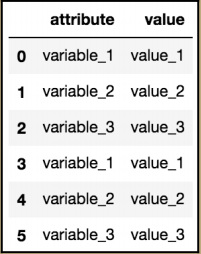

In [68]:
Image(filename='data/descriptions/ch08_01.PNG')

In this example, the first and last three rows represent two distinct observations that should
each be rows. The data needs to be pivoted such that it ends up like this:

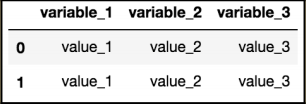

In [69]:
Image(filename='data/descriptions/ch08_02.PNG')

## Getting ready

In this recipe, we identify the column containing the improperly structured variables and
pivot it to create tidy data.

## How to do it...

1. Read in the restaurant `inspections` dataset, and convert the `Date` column data
type to `datetime64`:

In [70]:
inspections = pd.read_csv('data/restaurant_inspections.csv', parse_dates=['Date'])
inspections.head(10)

Name       Date         Info  \
0  E & E Grill House 2017-08-08      Borough   
1  E & E Grill House 2017-08-08      Cuisine   
2  E & E Grill House 2017-08-08  Description   
3  E & E Grill House 2017-08-08        Grade   
4  E & E Grill House 2017-08-08        Score   
5        PIZZA WAGON 2017-04-12      Borough   
6        PIZZA WAGON 2017-04-12      Cuisine   
7        PIZZA WAGON 2017-04-12  Description   
8        PIZZA WAGON 2017-04-12        Grade   
9        PIZZA WAGON 2017-04-12        Score   

                                               Value  
0                                          MANHATTAN  
1                                           American  
2  Non-food contact surface improperly constructe...  
3                                                  A  
4                                                9.0  
5                                           BROOKLYN  
6                                              Pizza  
7  Food contact surface not properly washed, rins...  
8                                                  A  
9                                               10.0

2. This dataset has two variables, `Name` and `Date`, that are each correctly contained
in a single column. The `Info` column itself has five different variables: `Borough`,
`Cuisine`, `Description`, `Grade`, and `Score`. Let's attempt to use the `pivot`
method to keep the `Name` and `Date` columns vertical, create new columns out of
all the values in the `Info` column, and use the `Value` column as their intersection:

```
>>> inspections.pivot(index=['Name', 'Date'], columns='Info', values='Value')
NotImplementedError: > 1 ndim Categorical are not supported at this time
```

3. Unfortunately, pandas developers have not implemented this functionality for
us. There is a good chance that in the future, this line of code is going to work.
Thankfully, for the most part, pandas has multiple ways of accomplishing the
same task. Let's put `Name`, `Date`, and `Info` into the index:

In [71]:
inspections.set_index(['Name','Date', 'Info']).head(10)

Value
Name              Date       Info                                                          
E & E Grill House 2017-08-08 Borough                                              MANHATTAN
                             Cuisine                                               American
                             Description  Non-food contact surface improperly constructe...
                             Grade                                                        A
                             Score                                                      9.0
PIZZA WAGON       2017-04-12 Borough                                               BROOKLYN
                             Cuisine                                                  Pizza
                             Description  Food contact surface not properly washed, rins...
                             Grade                                                        A
                             Score                                                     10.0

4. Use the `unstack` method to pivot all the values in the `Info` column:

In [72]:
inspections.set_index(['Name','Date', 'Info']).unstack('Info').head()

Value  \
Info                                              Borough   
Name                                Date                    
3 STAR JUICE CENTER                 2017-05-10   BROOKLYN   
A & L PIZZA RESTAURANT              2017-08-22   BROOKLYN   
AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25   BROOKLYN   
ANTOJITOS DELI FOOD                 2017-06-01   BROOKLYN   
BANGIA                              2017-06-16  MANHATTAN   

                                                                                                   \
Info                                                                                      Cuisine   
Name                                Date                                                            
3 STAR JUICE CENTER                 2017-05-10                     Juice, Smoothies, Fruit Salads   
A & L PIZZA RESTAURANT              2017-08-22                                              Pizza   
AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25                                            Turkish   
ANTOJITOS DELI FOOD                 2017-06-01  Latin (Cuban, Dominican, Puerto Rican, South &...   
BANGIA                              2017-06-16                                             Korean   

                                                                                                   \
Info                                                                                  Description   
Name                                Date                                                            
3 STAR JUICE CENTER                 2017-05-10  Facility not vermin proof. Harborage or condit...   
A & L PIZZA RESTAURANT              2017-08-22  Facility not vermin proof. Harborage or condit...   
AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25  Plumbing not properly installed or maintained;...   
ANTOJITOS DELI FOOD                 2017-06-01  Live roaches present in facility's food and/or...   
BANGIA                              2017-06-16  Covered garbage receptacle not provided or ina...   

                                                            
Info                                           Grade Score  
Name                                Date                    
3 STAR JUICE CENTER                 2017-05-10     A  12.0  
A & L PIZZA RESTAURANT              2017-08-22     A   9.0  
AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25     A  13.0  
ANTOJITOS DELI FOOD                 2017-06-01     A  10.0  
BANGIA                              2017-06-16     A   9.0

5. Make the index levels into columns with the `reset_index` method:

In [73]:
insp_tidy = inspections.set_index(['Name','Date', 'Info']) \
                               .unstack('Info') \
                               .reset_index(col_level=-1)
insp_tidy.head()

Value  \
Info                                 Name       Date    Borough   
0                     3 STAR JUICE CENTER 2017-05-10   BROOKLYN   
1                  A & L PIZZA RESTAURANT 2017-08-22   BROOKLYN   
2     AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25   BROOKLYN   
3                     ANTOJITOS DELI FOOD 2017-06-01   BROOKLYN   
4                                  BANGIA 2017-06-16  MANHATTAN   

                                                         \
Info                                            Cuisine   
0                        Juice, Smoothies, Fruit Salads   
1                                                 Pizza   
2                                               Turkish   
3     Latin (Cuban, Dominican, Puerto Rican, South &...   
4                                                Korean   

                                                                     
Info                                        Description Grade Score  
0     Facility not vermin proof. Harborage or condit...     A  12.0  
1     Facility not vermin proof. Harborage or condit...     A   9.0  
2     Plumbing not properly installed or maintained;...     A  13.0  
3     Live roaches present in facility's food and/or...     A  10.0  
4     Covered garbage receptacle not provided or ina...     A   9.0

6 The dataset is tidy, but there is some annoying leftover pandas debris that needs
to be removed. Let's use the MultiIndex method `droplevel` to remove the top
column level and then rename the index level to `None`:

In [74]:
insp_tidy.columns = insp_tidy.columns.droplevel(0).rename(None)
insp_tidy.head()

Name       Date    Borough  \
0                  3 STAR JUICE CENTER 2017-05-10   BROOKLYN   
1               A & L PIZZA RESTAURANT 2017-08-22   BROOKLYN   
2  AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25   BROOKLYN   
3                  ANTOJITOS DELI FOOD 2017-06-01   BROOKLYN   
4                               BANGIA 2017-06-16  MANHATTAN   

                                             Cuisine  \
0                     Juice, Smoothies, Fruit Salads   
1                                              Pizza   
2                                            Turkish   
3  Latin (Cuban, Dominican, Puerto Rican, South &...   
4                                             Korean   

                                         Description Grade Score  
0  Facility not vermin proof. Harborage or condit...     A  12.0  
1  Facility not vermin proof. Harborage or condit...     A   9.0  
2  Plumbing not properly installed or maintained;...     A  13.0  
3  Live roaches present in facility's food and/or...     A  10.0  
4  Covered garbage receptacle not provided or ina...     A   9.0

7. The creation of the column MultiIndex in step 4 could have been avoided by
converting that one column DataFrame into a Series with the `squeeze` method.
The following code produces the same result as the previous step:

In [75]:
inspections.set_index(['Name','Date', 'Info']) \
          .squeeze() \
          .unstack('Info') \
          .reset_index() \
          .rename_axis(None, axis='columns')

Name       Date        Borough  \
0                   3 STAR JUICE CENTER 2017-05-10       BROOKLYN   
1                A & L PIZZA RESTAURANT 2017-08-22       BROOKLYN   
2   AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25       BROOKLYN   
3                   ANTOJITOS DELI FOOD 2017-06-01       BROOKLYN   
4                                BANGIA 2017-06-16      MANHATTAN   
..                                  ...        ...            ...   
95                      VALL'S PIZZERIA 2017-03-15  STATEN ISLAND   
96                            VIP GRILL 2017-06-12       BROOKLYN   
97                              WAHIZZA 2017-04-13      MANHATTAN   
98                    WANG MANDOO HOUSE 2017-08-29         QUEENS   
99                     XIAOYAN YABO INC 2017-08-29         QUEENS   

                                              Cuisine  \
0                      Juice, Smoothies, Fruit Salads   
1                                               Pizza   
2                                             Turkish   
3   Latin (Cuban, Dominican, Puerto Rican, South &...   
4                                              Korean   
..                                                ...   
95                                      Pizza/Italian   
96                                      Jewish/Kosher   
97                                              Pizza   
98                                             Korean   
99                                             Korean   

                                          Description Grade Score  
0   Facility not vermin proof. Harborage or condit...     A  12.0  
1   Facility not vermin proof. Harborage or condit...     A   9.0  
2   Plumbing not properly installed or maintained;...     A  13.0  
3   Live roaches present in facility's food and/or...     A  10.0  
4   Covered garbage receptacle not provided or ina...     A   9.0  
..                                                ...   ...   ...  
95  Wiping cloths soiled or not stored in sanitizi...     A   9.0  
96        Hot food item not held at or above 140Âº F.     A  10.0  
97  No facilities available to wash, rinse and san...     A  10.0  
98  Accurate thermometer not provided in refrigera...     A  12.0  
99  Evidence of mice or live mice present in facil...     Z  49.0  

[100 rows x 7 columns]

## How it works...

In step 1, we notice that there are five variables placed vertically in the `Info` column with
their corresponding value in the `Value` column. Because we need to pivot each of these five
variables as horizontal column names, it would seem that the `pivot` method would work.
Unfortunately, pandas developers have yet to implement this special case when there is
more than one non-pivoted column. We are forced to use a different method.

The `unstack` method also pivots vertical data, but only for data in the index. Step 3 begins
this process by moving both the columns that will and will not be pivoted into the index
with the `set_index` method. Once these columns are in the index, `unstack` can be put to
work as done in step 3.

Notice that as we are unstacking a DataFrame, pandas keeps the original column names
(here, it is just a single column, `Value`) and creates a MultiIndex with the old column names
as the upper level. The dataset is now essentially tidy but we go ahead and make our non-pivoted columns normal columns with the `reset_index` method. Because we have
MultiIndex columns, we can choose which level the new column names will belong to with
the `col_level` parameter. By default, the names are inserted into the uppermost level
(level 0). We use `-1` to indicate the bottommost level.

After all this, we have some excess DataFrame names and indexes that need to be
discarded. Unfortunately, there isn't a DataFrame method that can remove levels, so we
must drop down into the index and use its `droplevel` method. Here, we overwrite the old
MultiIndex columns with single-level columns. These columns still have a useless name
attribute, `Info`, which is renamed to `None`.

Cleaning up the MultiIndex columns could have been avoided by forcing the resulting
DataFrame from step 3 to a Series. The `squeeze` method works only on single-column
DataFrames and turns them into Series.

## There's more...

It is actually possible to use the `pivot_table` method, which has no restrictions on how
many non-pivoted columns are allowed. The `pivot_table` method differs from `pivot` by
performing an aggregation for all the values that correspond to the intersection between the
columns in the `index` and `columns` parameters. Because it is possible that there are
multiple values in this intersection, `pivot_table` requires the user to pass it an
aggregating function, in order to output a single value. We use the `first` aggregating
function, which takes the first of the values of the group. In this particular example, there is
exactly one value for each intersection, so there is nothing to be aggregated. The default
aggregation function is the mean, which will produce an error here, since some of the
values are strings:

In [76]:
inspections.pivot_table(index=['Name', 'Date'], 
                        columns='Info', 
                        values='Value', 
                        aggfunc='first') \
           .reset_index()\
           .rename_axis(None, axis='columns')

Name       Date        Borough  \
0                   3 STAR JUICE CENTER 2017-05-10       BROOKLYN   
1                A & L PIZZA RESTAURANT 2017-08-22       BROOKLYN   
2   AKSARAY TURKISH CAFE AND RESTAURANT 2017-07-25       BROOKLYN   
3                   ANTOJITOS DELI FOOD 2017-06-01       BROOKLYN   
4                                BANGIA 2017-06-16      MANHATTAN   
..                                  ...        ...            ...   
95                      VALL'S PIZZERIA 2017-03-15  STATEN ISLAND   
96                            VIP GRILL 2017-06-12       BROOKLYN   
97                              WAHIZZA 2017-04-13      MANHATTAN   
98                    WANG MANDOO HOUSE 2017-08-29         QUEENS   
99                     XIAOYAN YABO INC 2017-08-29         QUEENS   

                                              Cuisine  \
0                      Juice, Smoothies, Fruit Salads   
1                                               Pizza   
2                                             Turkish   
3   Latin (Cuban, Dominican, Puerto Rican, South &...   
4                                              Korean   
..                                                ...   
95                                      Pizza/Italian   
96                                      Jewish/Kosher   
97                                              Pizza   
98                                             Korean   
99                                             Korean   

                                          Description Grade Score  
0   Facility not vermin proof. Harborage or condit...     A  12.0  
1   Facility not vermin proof. Harborage or condit...     A   9.0  
2   Plumbing not properly installed or maintained;...     A  13.0  
3   Live roaches present in facility's food and/or...     A  10.0  
4   Covered garbage receptacle not provided or ina...     A   9.0  
..                                                ...   ...   ...  
95  Wiping cloths soiled or not stored in sanitizi...     A   9.0  
96        Hot food item not held at or above 140Âº F.     A  10.0  
97  No facilities available to wash, rinse and san...     A  10.0  
98  Accurate thermometer not provided in refrigera...     A  12.0  
99  Evidence of mice or live mice present in facil...     Z  49.0  

[100 rows x 7 columns]

# Tidying when two or more values are stored in the same cell

Tabular data, by nature, is two-dimensional, and thus, there is a limited amount of
information that can be presented in a single cell. As a workaround, you will occasionally
see datasets with more than a single value stored in the same cell. Tidy data allows for
exactly a single value for each cell. To rectify these situations, you will typically need to
parse the string data into multiple columns with the methods from the `str` Series accessor.

## Getting ready...

In this recipe, we examine a dataset that has a column containing multiple different
variables in each cell. We use the `str` accessor to parse these strings into separate columns
to tidy the data.

## How to do it..

Read in the Texas `cities` dataset, and identify the variables:

In [77]:
cities = pd.read_csv('data/texas_cities.csv')
cities

City             Geolocation
0  Houston  29.7604° N, 95.3698° W
1   Dallas  32.7767° N, 96.7970° W
2   Austin  30.2672° N, 97.7431° W

The `City` column looks good and contains exactly one value. The `Geolocation`
column, on the other hand, contains four variables: `latitude, latitude
direction, longitude`, and `longitude` direction. Let's split the
`Geolocation` column into four separate columns:

In [78]:
geolocations = cities.Geolocation.str.split(pat='. ', expand=True)
geolocations.columns = ['latitude', 'latitude direction', 'longitude', 'longitude direction']
geolocations

latitude latitude direction longitude longitude direction
0  29.7604                  N   95.3698                   W
1  32.7767                  N   96.7970                   W
2  30.2672                  N   97.7431                   W

Because the original data type for the `Geolocation` was an object, all the new
columns are also objects. Let's change `latitude` and `longitude` into floats:

In [79]:
geolocations = geolocations.astype({'latitude':'float', 'longitude':'float'})
geolocations.dtypes

latitude               float64
latitude direction      object
longitude              float64
longitude direction     object
dtype: object

Concatenate these new columns with the `City` column from the original:

In [80]:
cities_tidy = pd.concat([cities['City'], geolocations], axis='columns')
cities_tidy

City  latitude latitude direction  longitude longitude direction
0  Houston   29.7604                  N    95.3698                   W
1   Dallas   32.7767                  N    96.7970                   W
2   Austin   30.2672                  N    97.7431                   W

In [81]:
pd.concat([cities['City'], geolocations], axis='columns')

City  latitude latitude direction  longitude longitude direction
0  Houston   29.7604                  N    95.3698                   W
1   Dallas   32.7767                  N    96.7970                   W
2   Austin   30.2672                  N    97.7431                   W

## How it works...

After reading the data, we decide how many variables there are in the dataset. Here, we
chose to split the `Geolocation` column into four variables, but we could have just chosen
two for latitude and longitude and used a negative sign to differentiate between west/east
and south/north.

There are a few ways to parse the `Geolocation` column with the methods from the `str`
accessor. The easiest way is to use the `split` method. We pass it a simple regular
expression defined by any character (the period) and a space. When a space follows any
character, a split is made, and a new column is formed. The first occurrence of this pattern
takes place at the end of the latitude. A space follows the degree character, and a split is
formed. The splitting characters are discarded and not kept in the resulting columns. The
next split matches the comma and space following directly after the latitude direction.

A total of three splits are made, resulting in four columns. The second line in step 2
provides them with meaningful names. Even though the resulting `latitude` and
`longitude` columns appear to be floats, they are not. They were originally parsed from an
object column and therefore remain object data types. Step 3 uses a dictionary to map the
column names to their new types.

Instead of using a dictionary, which would require a lot of typing if you had many column
names, you can use the function `to_numeric` to attempt to convert each column to either
integer or float. To apply this function iteratively over each column, use the `apply` method
with the following:

In [82]:
temp = geolocations.apply(pd.to_numeric, errors='ignore')
temp

latitude latitude direction  longitude longitude direction
0   29.7604                  N    95.3698                   W
1   32.7767                  N    96.7970                   W
2   30.2672                  N    97.7431                   W

Step 4 concatenates the city to the front of this new DataFrame to complete the process of
making tidy data.

In [83]:
temp.dtypes

latitude               float64
latitude direction      object
longitude              float64
longitude direction     object
dtype: object

## There's more...

The `split` method worked exceptionally well in this example with a simple regular
expression. For other examples, some columns might require you to create splits on several
different patterns. To search for multiple regular expressions, use the pipe character `|`. For
instance, if we wanted to split only the degree symbol and comma, each followed by a
space, we would do the following:

In [84]:
cities.Geolocation.str.split(pat='° |, ', expand=True)

0  1        2  3
0  29.7604  N  95.3698  W
1  32.7767  N  96.7970  W
2  30.2672  N  97.7431  W

This returns the same DataFrame from step 2. Any number of additional split patterns may
be appended to the preceding string pattern with the pipe character.

The `extract` method is another excellent method which allows you to extract specific
groups within each cell. These capture groups must be enclosed in parentheses. Anything
that matches outside the parentheses is not present in the result. The following line
produces the same output as step 2:

In [85]:
cities.Geolocation.str.extract('([0-9.]+). (N|S), ([0-9.]+). (E|W)', expand=True)

0  1        2  3
0  29.7604  N  95.3698  W
1  32.7767  N  96.7970  W
2  30.2672  N  97.7431  W

This regular expression has four capture groups. The first and third groups search for at
least one or more consecutive digits with decimals. The second and fourth groups search for
a single character (the direction). The first and third capture groups are separated by any
character followed by a space. The second capture group is separated by a comma and then
a space.

# Tidying when variables are stored in column names and values

One particularly difficult form of messy data to diagnose appears whenever variables are
stored both horizontally across the column names and vertically down column values. You
will typically encounter this type of dataset, not in a database, but from a summarized
report that someone else has already generated.

## Getting ready

In this recipe, variables are identified both vertically and horizontally and reshaped into
tidy data with the `melt` and `pivot_table` methods.

## How to do it...

1. Read in the `sensors` dataset and identify the variables:

In [86]:
sensors = pd.read_csv('data/sensors.csv')
sensors

Group     Property  2012  2013  2014  2015  2016
0     A     Pressure   928   873   814   973   870
1     A  Temperature  1026  1038  1009  1036  1042
2     A         Flow   819   806   861   882   856
3     B     Pressure   817   877   914   806   942
4     B  Temperature  1008  1041  1009  1002  1013
5     B         Flow   887   899   837   824   873

2. The only variable placed correctly in a vertical column is `Group`. The `Property`
column appears to have three unique variables, `Pressure`, `Temperature`, and
`Flow`. The rest of the columns `2012` to `2016` are themselves a single variable,
which we can sensibly name `Year`. It isn't possible to restructure this kind of
messy data with a single DataFrame method. Let's begin with the `melt` method
to pivot the years into their own column:

In [87]:
sensors.melt(id_vars=['Group', 'Property'], var_name='Year').head(6)

Group     Property  Year  value
0     A     Pressure  2012    928
1     A  Temperature  2012   1026
2     A         Flow  2012    819
3     B     Pressure  2012    817
4     B  Temperature  2012   1008
5     B         Flow  2012    887

3. This takes care of one of our issues. Let's use the `pivot_table` method to pivot
the `Property` column into new column names:

In [88]:
sensors.melt(id_vars=['Group', 'Property'], var_name='Year') \
       .pivot_table(index=['Group', 'Year'], columns='Property', values='value') \
       .reset_index() \
       .rename_axis(None, axis='columns')

Group  Year  Flow  Pressure  Temperature
0     A  2012   819       928         1026
1     A  2013   806       873         1038
2     A  2014   861       814         1009
3     A  2015   882       973         1036
4     A  2016   856       870         1042
5     B  2012   887       817         1008
6     B  2013   899       877         1041
7     B  2014   837       914         1009
8     B  2015   824       806         1002
9     B  2016   873       942         1013

## How it works...

Once we have identified the variables in step 1, we can begin our restructuring. Pandas
does not have a method to pivot columns simultaneously, so we must take on this task one
step at a time. We correct the years by keeping the `Property` column vertical by passing it
to the `id_vars` parameter in the melt method.

The result is now precisely the pattern of messy data found in the preceding recipe, *Tidying
when multiple variables are stored as column values*. As explained in the *There's more* section of
that recipe, we must use `pivot_table` to pivot a DataFrame when using more than one
column in the `index` parameter. After pivoting, the `Group` and `Year` variables are stuck in
the index. We push them back out as columns. The `pivot_table` method preserves the
column name used in the `columns` parameter as the name of the column index. After
resetting the index, this name is meaningless, and we remove it with `rename_axis`.

## There's more...

Whenever a solution involves `melt`, `pivot_table`, or `pivot`, you can be sure that there is
an alternative method using `stack` and `unstack`. The trick is first to move the columns that
are not currently being pivoted into the index:

In [89]:
sensors.set_index(['Group', 'Property']) \
       .stack() \
       .unstack('Property') \
       .rename_axis(['Group', 'Year'], axis='index') \
       .rename_axis(None, axis='columns') \
       .reset_index()

Group  Year  Flow  Pressure  Temperature
0     A  2012   819       928         1026
1     A  2013   806       873         1038
2     A  2014   861       814         1009
3     A  2015   882       973         1036
4     A  2016   856       870         1042
5     B  2012   887       817         1008
6     B  2013   899       877         1041
7     B  2014   837       914         1009
8     B  2015   824       806         1002
9     B  2016   873       942         1013

# Tidying when multiple observational units are stored in the same table

It is generally easier to maintain data when each table contains information from a single
observational unit. On the other hand, it can be easier to find insights when all data is in a
single table, and in the case of machine learning, all data must be in a single table. The focus
of tidy data is not on directly performing analysis. Rather, it is structuring the data so that
analysis is easier further down the line, and when there are multiple observational units
in one table, they may need to get separated into their own tables.

## Getting ready

In this recipe, we use the `movie` dataset to identify the three observational units (movies,
actors, and directors) and create separate tables for each. One of the keys to this recipe is
understanding that the actor and director Facebook likes are independent of the movie.
Each actor and director is mapped to a single value representing their number of Facebook
likes. Due to this independence, we can separate the data for the movies, directors, and
actors into their own tables. Database folks call this process normalization, which increases
data integrity and reduces redundancy.

## How to do it...

1. Read in the altered `movie` dataset, and output the first five rows:

In [90]:
movie = pd.read_csv('data/movie_altered.csv')
movie.head()

title rating    year  duration  \
0                                      Avatar  PG-13  2009.0     178.0   
1    Pirates of the Caribbean: At World's End  PG-13  2007.0     169.0   
2                                     Spectre  PG-13  2015.0     148.0   
3                       The Dark Knight Rises  PG-13  2012.0     164.0   
4  Star Wars: Episode VII - The Force Awakens    NaN     NaN       NaN   

          director_1  director_fb_likes_1          actor_1           actor_2  \
0      James Cameron                  0.0      CCH Pounder  Joel David Moore   
1     Gore Verbinski                563.0      Johnny Depp     Orlando Bloom   
2         Sam Mendes                  0.0  Christoph Waltz      Rory Kinnear   
3  Christopher Nolan              22000.0        Tom Hardy    Christian Bale   
4        Doug Walker                131.0      Doug Walker        Rob Walker   

                actor_3  actor_fb_likes_1  actor_fb_likes_2  actor_fb_likes_3  
0             Wes Studi            1000.0             936.0             855.0  
1        Jack Davenport           40000.0            5000.0            1000.0  
2      Stephanie Sigman           11000.0             393.0             161.0  
3  Joseph Gordon-Levitt           27000.0           23000.0           23000.0  
4                   NaN             131.0              12.0               NaN

2. This dataset contains information on the movie itself, the director, and actors.
These three entities can be considered observational units. Before we start, let's
use the `insert` method to create a column to uniquely identify each movie:

In [91]:
movie.insert(0, 'id', np.arange(len(movie)))
movie.head()

id                                       title rating    year  duration  \
0   0                                      Avatar  PG-13  2009.0     178.0   
1   1    Pirates of the Caribbean: At World's End  PG-13  2007.0     169.0   
2   2                                     Spectre  PG-13  2015.0     148.0   
3   3                       The Dark Knight Rises  PG-13  2012.0     164.0   
4   4  Star Wars: Episode VII - The Force Awakens    NaN     NaN       NaN   

          director_1  director_fb_likes_1          actor_1           actor_2  \
0      James Cameron                  0.0      CCH Pounder  Joel David Moore   
1     Gore Verbinski                563.0      Johnny Depp     Orlando Bloom   
2         Sam Mendes                  0.0  Christoph Waltz      Rory Kinnear   
3  Christopher Nolan              22000.0        Tom Hardy    Christian Bale   
4        Doug Walker                131.0      Doug Walker        Rob Walker   

                actor_3  actor_fb_likes_1  actor_fb_likes_2  actor_fb_likes_3  
0             Wes Studi            1000.0             936.0             855.0  
1        Jack Davenport           40000.0            5000.0            1000.0  
2      Stephanie Sigman           11000.0             393.0             161.0  
3  Joseph Gordon-Levitt           27000.0           23000.0           23000.0  
4                   NaN             131.0              12.0               NaN

3. Let's attempt to tidy this dataset with the `wide_to_long` function to put all the
actors in one column and their corresponding Facebook likes in another, and do
the same for the director, even though there is only one per movie:

In [92]:
stubnames = ['director', 'director_fb_likes', 'actor', 'actor_fb_likes']
movie_long = pd.wide_to_long(movie, 
                                 stubnames=stubnames, 
                                 i='id', 
                                 j='num', 
                                 sep='_').reset_index()
movie_long['num'] = movie_long['num'].astype(int)
movie_long.head(9)

id  num    year  duration                                     title rating  \
0   0    1  2009.0     178.0                                    Avatar  PG-13   
1   0    2  2009.0     178.0                                    Avatar  PG-13   
2   0    3  2009.0     178.0                                    Avatar  PG-13   
3   1    1  2007.0     169.0  Pirates of the Caribbean: At World's End  PG-13   
4   1    2  2007.0     169.0  Pirates of the Caribbean: At World's End  PG-13   
5   1    3  2007.0     169.0  Pirates of the Caribbean: At World's End  PG-13   
6   2    1  2015.0     148.0                                   Spectre  PG-13   
7   2    2  2015.0     148.0                                   Spectre  PG-13   
8   2    3  2015.0     148.0                                   Spectre  PG-13   

         director  director_fb_likes             actor  actor_fb_likes  
0   James Cameron                0.0       CCH Pounder          1000.0  
1             NaN                NaN  Joel David Moore           936.0  
2             NaN                NaN         Wes Studi           855.0  
3  Gore Verbinski              563.0       Johnny Depp         40000.0  
4             NaN                NaN     Orlando Bloom          5000.0  
5             NaN                NaN    Jack Davenport          1000.0  
6      Sam Mendes                0.0   Christoph Waltz         11000.0  
7             NaN                NaN      Rory Kinnear           393.0  
8             NaN                NaN  Stephanie Sigman           161.0

4. The dataset is now ready to be split into multiple smaller tables:

In [93]:
movie_table = movie_long[['id','title', 'year', 'duration', 'rating']]
director_table = movie_long[['id', 'director', 'num', 'director_fb_likes']]
actor_table = movie_long[['id', 'actor', 'num', 'actor_fb_likes']]

In [94]:
movie_table.head(9)

id                                     title    year  duration rating
0   0                                    Avatar  2009.0     178.0  PG-13
1   0                                    Avatar  2009.0     178.0  PG-13
2   0                                    Avatar  2009.0     178.0  PG-13
3   1  Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
4   1  Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
5   1  Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
6   2                                   Spectre  2015.0     148.0  PG-13
7   2                                   Spectre  2015.0     148.0  PG-13
8   2                                   Spectre  2015.0     148.0  PG-13

In [95]:
director_table.head(9)

id        director  num  director_fb_likes
0   0   James Cameron    1                0.0
1   0             NaN    2                NaN
2   0             NaN    3                NaN
3   1  Gore Verbinski    1              563.0
4   1             NaN    2                NaN
5   1             NaN    3                NaN
6   2      Sam Mendes    1                0.0
7   2             NaN    2                NaN
8   2             NaN    3                NaN

In [96]:
actor_table.head(9)

id             actor  num  actor_fb_likes
0   0       CCH Pounder    1          1000.0
1   0  Joel David Moore    2           936.0
2   0         Wes Studi    3           855.0
3   1       Johnny Depp    1         40000.0
4   1     Orlando Bloom    2          5000.0
5   1    Jack Davenport    3          1000.0
6   2   Christoph Waltz    1         11000.0
7   2      Rory Kinnear    2           393.0
8   2  Stephanie Sigman    3           161.0

5. There are still several issues with these tables. The `movie` table duplicates each
movie three times, the director table has two missing rows for each ID, and a few
movies have missing values for some of the actors. Let's take care of these issues:

In [97]:
movie_table = movie_table.drop_duplicates().reset_index(drop=True)
director_table = director_table.dropna().reset_index(drop=True)
actor_table = actor_table.dropna().reset_index(drop=True)

In [98]:
movie_table.head()

id                                       title    year  duration rating
0   0                                      Avatar  2009.0     178.0  PG-13
1   1    Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
2   2                                     Spectre  2015.0     148.0  PG-13
3   3                       The Dark Knight Rises  2012.0     164.0  PG-13
4   4  Star Wars: Episode VII - The Force Awakens     NaN       NaN    NaN

In [99]:
director_table.head()

id           director  num  director_fb_likes
0   0      James Cameron    1                0.0
1   1     Gore Verbinski    1              563.0
2   2         Sam Mendes    1                0.0
3   3  Christopher Nolan    1            22000.0
4   4        Doug Walker    1              131.0

6. Now that we have separated the observational units into their own tables, let's
compare the memory of the original dataset with these three tables:

In [100]:
movie.memory_usage(deep=True).sum()

2300682

In [101]:
movie_table.memory_usage(deep=True).sum() + \
director_table.memory_usage(deep=True).sum() + \
actor_table.memory_usage(deep=True).sum()

2607442

7. Our new tidier data actually takes up a little more memory. This is to be
expected, as all the data in the original columns are simply spread out into the
new tables. The new tables also each have an index, and two of them have an
extra `num` column, which accounts for the extra memory. We can, however, take
advantage of the fact that the count of Facebook likes is independent of the
movie, meaning that each actor and director has exactly one count of Facebook
likes for all movies. Before we can do this, we need to create another table
mapping each movie to each actor/director. Let's first create `id` columns specific
to the actor and director tables, uniquely identifying each actor/director:

In [102]:
director_cat = pd.Categorical(director_table['director'])
director_table.insert(1, 'director_id', director_cat.codes)
actor_cat = pd.Categorical(actor_table['actor'])
actor_table.insert(1, 'actor_id', actor_cat.codes)
director_table.head()

id  director_id           director  num  director_fb_likes
0   0          922      James Cameron    1                0.0
1   1          794     Gore Verbinski    1              563.0
2   2         2020         Sam Mendes    1                0.0
3   3          373  Christopher Nolan    1            22000.0
4   4          600        Doug Walker    1              131.0

In [103]:
actor_table.head()

id  actor_id             actor  num  actor_fb_likes
0   0       824       CCH Pounder    1          1000.0
1   0      2867  Joel David Moore    2           936.0
2   0      6099         Wes Studi    3           855.0
3   1      2971       Johnny Depp    1         40000.0
4   1      4536     Orlando Bloom    2          5000.0

8. We can use these tables to form our intermediate tables and unique
`actor/director` tables. Let's first do this with the `director` tables:

In [104]:
director_associative = director_table[['id', 'director_id', 'num']]
dcols = ['director_id', 'director', 'director_fb_likes']
director_unique = director_table[dcols].drop_duplicates().reset_index(drop=True)
director_associative.head()                     

id  director_id  num
0   0          922    1
1   1          794    1
2   2         2020    1
3   3          373    1
4   4          600    1

In [105]:
director_unique.head()

director_id           director  director_fb_likes
0          922      James Cameron                0.0
1          794     Gore Verbinski              563.0
2         2020         Sam Mendes                0.0
3          373  Christopher Nolan            22000.0
4          600        Doug Walker              131.0

9. Let's do the same thing with the `actor` table:

In [106]:
actor_associative = actor_table[['id', 'actor_id', 'num']]
acols = ['actor_id', 'actor', 'actor_fb_likes']
actor_unique = actor_table[acols].drop_duplicates().reset_index(drop=True)
actor_associative.head()

id  actor_id  num
0   0       824    1
1   0      2867    2
2   0      6099    3
3   1      2971    1
4   1      4536    2

In [107]:
actor_unique.head()

actor_id             actor  actor_fb_likes
0       824       CCH Pounder          1000.0
1      2867  Joel David Moore           936.0
2      6099         Wes Studi           855.0
3      2971       Johnny Depp         40000.0
4      4536     Orlando Bloom          5000.0

10. Let's find out how much memory our new tables consume:

In [108]:
movie_table.memory_usage(deep=True).sum() + \
director_associative.memory_usage(deep=True).sum() + \
director_unique.memory_usage(deep=True).sum() + \
actor_associative.memory_usage(deep=True).sum() + \
actor_unique.memory_usage(deep=True).sum()

1816042

11. Now that we have normalized our tables, we can build an entity-relationship
diagram showing all the tables (entities), columns, and relationships. This
diagram was created with the easy to use ERDPlus (`https:/​/​erdplus.​com`):

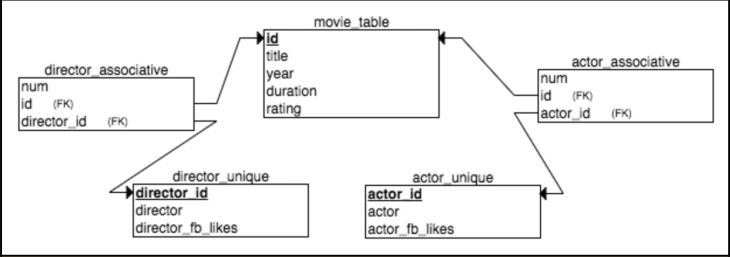

In [109]:
Image(filename='data/descriptions/ch08_03.PNG')

## How it works...

After importing the data and identifying the three entities, we must create a unique
identifier for each observation so that we can link to the movies, actors and directors
together once they have been separated into different tables. In step 2, we simply set the ID
column as the row number beginning from zero. In step 3, we use the `wide_to_long`
function to simultaneously `melt` the `actor` and `director` columns. It uses the integer
suffix of the columns to align the data vertically and places this integer suffix in the index.
The parameter j is used to control its name. The values in the columns not in the
`stubnames` list repeat to align with the columns that were melted.

In step 4, we create our three new tables, keeping the id column in each. We also keep the
num column to identify the exact `director/actor` column from which it was derived. Step
5 condenses each table by removing duplicates and missing values.

After step 5, the three observational units are in their own tables, but they still contain the
same amount of data as the original (and a bit more), as seen in step 6. To return the correct
number of bytes from the `memory_usage` method for `object` data type columns, you must
set the `deep` parameter to `True`.

Each actor/director needs only one entry in his or her respective tables. We can't simply
make a table of just actor name and Facebook likes, as there would be no way to link the
actors back to the original movie. The relationship between movies and actors is called a
**many-to-many relationship**. Each movie is associated with multiple actors, and each actor
can appear in multiple movies. To resolve this relationship, an intermediate or associative
table is created, which contains the unique identifiers (**primary keys**) of both the movie and
actor.

To create associative tables, we must uniquely identify each actor/director. One trick is to
create a categorical data type out of each actor/director name with `pd.Categorical`.
Categorical data types have an internal map from each value to an integer. This integer is
found in the `codes` attribute, which is used as the unique ID. To set up the creation of the
associative table, we add this unique ID to the `actor/director` tables.

Step 8 and step 9 create the associative tables by selecting both of the unique identifiers.
Now, we can reduce the `actor` and `director` tables to just the unique names and
Facebook likes. This new arrangement of tables uses 20% less memory than the original.
Formal relational databases have entity-relationship diagrams to visualize the tables. In step
10, we use the simple ERDPlus tool to make the visualization, which greatly eases the
understanding of the relationships between the tables.

In [110]:
movie_table.head()

id                                       title    year  duration rating
0   0                                      Avatar  2009.0     178.0  PG-13
1   1    Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13
2   2                                     Spectre  2015.0     148.0  PG-13
3   3                       The Dark Knight Rises  2012.0     164.0  PG-13
4   4  Star Wars: Episode VII - The Force Awakens     NaN       NaN    NaN

## There's more...

It is possible to recreate the original `movie` table by joining all the tables back together. First,
join the associative tables to the `actor/director` tables. Then pivot the num column, and
add the column prefixes back:

In [111]:
actors = actor_associative.merge(actor_unique, on='actor_id') \
                          .drop('actor_id', 1) \
                          .pivot_table(index='id', columns='num', aggfunc='first')
actors.columns = actors.columns.get_level_values(0) + '_' + \
                 actors.columns.get_level_values(1).astype(str)
directors = director_associative.merge(director_unique, on='director_id') \
                          .drop('director_id', 1) \
                          .pivot_table(index='id', columns='num', aggfunc='first')
directors.columns = directors.columns.get_level_values(0) + '_' + \
                    directors.columns.get_level_values(1).astype(str)

In [112]:
actors.head()

actor_1           actor_2               actor_3  actor_fb_likes_1  \
id                                                                              
0       CCH Pounder  Joel David Moore             Wes Studi            1000.0   
1       Johnny Depp     Orlando Bloom        Jack Davenport           40000.0   
2   Christoph Waltz      Rory Kinnear      Stephanie Sigman           11000.0   
3         Tom Hardy    Christian Bale  Joseph Gordon-Levitt           27000.0   
4       Doug Walker        Rob Walker                   NaN             131.0   

    actor_fb_likes_2  actor_fb_likes_3  
id                                      
0              936.0             855.0  
1             5000.0            1000.0  
2              393.0             161.0  
3            23000.0           23000.0  
4               12.0               NaN

In [113]:
directors.head()

director_1  director_fb_likes_1
id                                        
0       James Cameron                  0.0
1      Gore Verbinski                563.0
2          Sam Mendes                  0.0
3   Christopher Nolan              22000.0
4         Doug Walker                131.0

These tables can now be joined together with `movie_table`:

In [114]:
movie2 = movie_table.merge(directors.reset_index(), on='id', how='left') \
                    .merge(actors.reset_index(), on='id', how='left')

In [115]:
movie2.head()

id                                       title    year  duration rating  \
0   0                                      Avatar  2009.0     178.0  PG-13   
1   1    Pirates of the Caribbean: At World's End  2007.0     169.0  PG-13   
2   2                                     Spectre  2015.0     148.0  PG-13   
3   3                       The Dark Knight Rises  2012.0     164.0  PG-13   
4   4  Star Wars: Episode VII - The Force Awakens     NaN       NaN    NaN   

          director_1  director_fb_likes_1          actor_1           actor_2  \
0      James Cameron                  0.0      CCH Pounder  Joel David Moore   
1     Gore Verbinski                563.0      Johnny Depp     Orlando Bloom   
2         Sam Mendes                  0.0  Christoph Waltz      Rory Kinnear   
3  Christopher Nolan              22000.0        Tom Hardy    Christian Bale   
4        Doug Walker                131.0      Doug Walker        Rob Walker   

                actor_3  actor_fb_likes_1  actor_fb_likes_2  actor_fb_likes_3  
0             Wes Studi            1000.0             936.0             855.0  
1        Jack Davenport           40000.0            5000.0            1000.0  
2      Stephanie Sigman           11000.0             393.0             161.0  
3  Joseph Gordon-Levitt           27000.0           23000.0           23000.0  
4                   NaN             131.0              12.0               NaN

In [116]:
movie.equals(movie2[movie.columns])

True